# Problem Statement

- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. 
- In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate
- Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 

# Solution Approach


- Building a High performing model which would help in predicting customers who will churn
- Building an Interpretable model which would help in identifying  predictor attributes which in turn would help the business to understand indicators of churn
- Understanding customer behaviour with the help of above 2 models



## Primary Steps to be followed during the case study

1. Data Cleaning
2. Filter High Value Customers
3. Derive Churn
4. Data Preparation
5. Modelling

### Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Having a check on display of pandas dataframes as per below setting
pd.set_option('display.max_columns',226)
pd.set_option('display.max_rows', 226)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

df = pd.read_csv('telecom_churn_data.csv')

In [3]:
# checking the head of df

df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# checking the shape

df.shape

(99999, 226)

In [5]:
# checking info of df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# checking the various columns in df

df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:
# checking the various categorical columns in df

df.select_dtypes(include=['object'])

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                6/30/2014            7/31/2014            8/31/2014   
1                6/30/2014            7/31/2014            8/31/2014   
2                6/30/2014            7/31/2014            8/31/2014   
3                6/30/2014            7/31/2014            8/31/2014   
4                6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
99994            6/30/2014            7/31/2014            8/31/2014   
99995            6/30/2014            7/31/2014            8/31/2014   
99996            6/30/2014            7/31/2014            8/31/2014   
99997            6/30/2014            7/31/2014            8/31/2014   
99998            6/30/2014            7/31/2014            8/31/2014   

      last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0                9/30/2014           6/21/2014           7/16/2014   
1                9/30/2014           6/29/2014           7/31/2014   
2                9/30/2014           6/17/2014           7/24/2014   
3                9/30/2014           6/28/2014           7/31/2014   
4                9/30/2014           6/26/2014           7/28/2014   
...                    ...                 ...                 ...   
99994            9/30/2014            6/3/2014           7/20/2014   
99995            9/30/2014           6/17/2014           7/17/2014   
99996            9/30/2014           6/13/2014           7/26/2014   
99997            9/30/2014           6/17/2014           7/19/2014   
99998            9/30/2014           6/16/2014                 NaN   

      date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0                8/8/2014           9/28/2014                6/21/2014   
1               8/28/2014           9/30/2014                      NaN   
2               8/14/2014           9/29/2014                      NaN   
3               8/31/2014           9/30/2014                      NaN   
4                8/9/2014           9/28/2014                 6/4/2014   
...                   ...                 ...                      ...   
99994           8/26/2014           9/25/2014                      NaN   
99995           8/24/2014           9/26/2014                      NaN   
99996                 NaN            9/2/2014                6/13/2014   
99997           8/20/2014           9/17/2014                6/17/2014   
99998                 NaN                 NaN                6/11/2014   

      date_of_last_rech_data_7 date_of_last_rech_data_8  \
0                    7/16/2014                 8/8/2014   
1                    7/25/2014                8/10/2014   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                          NaN                      NaN   
...                        ...                      ...   
99994                      NaN                      NaN   
99995                      NaN                      NaN   
99996                      NaN                      NaN   
99997                7/19/2014                8/20/2014   
99998                      NaN                      NaN   

      date_of_last_rech_data_9  
0                          NaN  
1                          NaN  
2                    9/17/2014  
3                          NaN  
4                          NaN  
...                        ...  
99994                      NaN  
99995                      NaN  
99996                      NaN  
99997                9/17/2014  
99998                      NaN  

[99999 rows x 12 columns]

In [8]:
# checking the various continuous columns in df

df.select_dtypes(include=['int64','float64'])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0                 0.0  197.385  214.816  213.803   21.100          NaN   
1                 0.0   34.047  355.074  268.321   86.285        24.11   
2                 0.0  167.690  189.058  210.226  290.714        11.54   
3                 0.0  221.338  251.102  508.054  389.500        99.91   
4                 0.0  261.636  309.876  238.174  163.426        50.31   
...               ...      ...      ...      ...      ...          ...   
99994             0.0   18.471   69.161   57.530   29.950         5.40   
99995             0.0  112.201   77.811   79.081  140.835        29.26   
99996             0.0  229.187    0.000    0.000    0.000         1.11   
99997             0.0  322.991  303.386  606.817  731.010         0.00   
99998             0.0  687.065    0.000    0.000    0.000        84.34   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0              NaN         0.00          NaN           NaN           NaN   
1            78.68         7.68        18.34         15.74         99.84   
2            55.24        37.26        74.81        143.33        220.59   
3            54.39       310.98       241.71        123.31        109.01   
4           149.44        83.89        58.78         76.96         91.88   
...            ...          ...          ...           ...           ...   
99994         3.36         5.91         0.00         15.19         54.46   
99995        18.13        16.06        49.49        100.83         69.01   
99996          NaN          NaN          NaN         21.04           NaN   
99997         0.00         0.00         0.00          0.00          0.00   
99998          NaN          NaN          NaN        166.46           NaN   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00           NaN            NaN            NaN   
1            304.76         53.76            0.0           0.00   
2            208.36        118.91            0.0           0.00   
3             71.68        113.54            0.0          54.86   
4            124.26         45.81            0.0           0.00   
...             ...           ...            ...            ...   
99994         52.79         27.14            0.0           0.00   
99995         66.39         56.13            0.0           0.00   
99996           NaN           NaN            0.0            NaN   
99997          0.00          0.00            0.0           0.00   
99998           NaN           NaN            0.0            NaN   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0               0.00            NaN            NaN            NaN   
1               0.00           0.00            0.0           0.00   
2               0.00          38.49            0.0           0.00   
3              44.38           0.00            0.0          28.09   
4               0.00           0.00            0.0           0.00   
...              ...            ...            ...            ...   
99994           0.00           0.00            0.0           0.00   
99995           0.00           0.95        

#### Observation

- As we can see above, there are total of 226 columns (12 categorical variables and 214 continuous variables)

#### Chekcing the descriptive stats



In [9]:
# checking the descriptive stats

df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

#### Observation

- As we can see from above, columns starting with name 'fb_user' and 'night_pck_user' appear as categorical since these have only 2 values i.e. 0.0 and 1.0
- We'll confirm the same in below steps


In [10]:
# checking value_counts of fb_user_6

df.fb_user_6.value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

In [11]:
# checking value_counts of night_pck_user_6

df.night_pck_user_6.value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

#### Creating column name lists by types of columns


In [12]:
# Creating column name lists by types of columns


id_cols = ['mobile_number','circle_id']

date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
            'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
            'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

cat_cols = ['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
            'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']




In [13]:
# converting the variables starting with 'fb_user' and 'night_pck_user' into categorical data types


for col in cat_cols:
    df[col] = df[col].astype('object')

## Step1 : Data Cleaning

### Null value check in the dataframe df

In [14]:
### Let us create a utility function to generate a list of null values in different dataframes
### We will utilize this function extensively througout the notebook.

def generateNullValuesTable(dataframe):
    totalNullValues = dataframe.isnull().sum().sort_values(ascending=False)
    percentageOfNullValues = round((dataframe.isnull().sum()*100/len(dataframe)).sort_values(ascending=False),2)
    columnNamesWithPrcntgOfNullValues = pd.concat([totalNullValues, percentageOfNullValues], axis=1, keys=['Total Null Values', 'Percentage of Null Values'])
    return columnNamesWithPrcntgOfNullValues

In [15]:
generateNullValuesTable(df)

Total Null Values  Percentage of Null Values
count_rech_2g_6                       74846                      74.85
date_of_last_rech_data_6              74846                      74.85
count_rech_3g_6                       74846                      74.85
av_rech_amt_data_6                    74846                      74.85
max_rech_data_6                       74846                      74.85
total_rech_data_6                     74846                      74.85
arpu_3g_6                             74846                      74.85
arpu_2g_6                             74846                      74.85
night_pck_user_6                      74846                      74.85
fb_user_6                             74846                      74.85
arpu_3g_7                             74428                      74.43
count_rech_2g_7                       74428                      74.43
fb_user_7                             74428                      74.43
count_rech_3g_7                       74428                      74.43
arpu_2g_7                             74428                      74.43
av_rech_amt_data_7                    74428                      74.43
max_rech_data_7                       74428                      74.43
night_pck_user_7                      74428                      74.43
total_rech_data_7                     74428                      74.43
date_of_last_rech_data_7              74428                      74.43
night_pck_user_9                      74077                      74.08
date_of_last_rech_data_9              74077                      74.08
fb_user_9                             74077                      74.08
arpu_2g_9                             74077                      74.08
max_rech_data_9                       74077                      74.08
arpu_3g_9                             74077                      74.08
total_rech_data_9                     74077                      74.08
av_rech_amt_data_9                    74077                      74.08
count_rech_3g_9                       74077                      74.08
count_rech_2g_9                       74077                      74.08
fb_user_8                             73660                      73.66
av_rech_amt_data_8                    73660                      73.66
count_rech_3g_8                       73660                      73.66
count_rech_2g_8                       73660                      73.66
date_of_last_rech_data_8              73660                      73.66
total_rech_data_8                     73660                      73.66
max_rech_data_8                       73660                      73.66
arpu_3g_8                             73660                      73.66
arpu_2g_8                             73660                      73.66
night_pck_user_8                      73660                      73.66
std_ic_t2m_mou_9                       7745                       7.75
spl_ic_mou_9                           7745                       7.75
loc_ic_mou_9                           7745                       7.75
isd_ic_mou_9                           7745                       7.75
std_ic_t2o_mou_9                       7745                       7.75
loc_ic_t2f_mou_9                       7745                       7.75
ic_others_9                            7745                       7.75
loc_og_t2f_mou_9                       7745                       7.75
loc_ic_t2m_mou_9                       7745                       7.75
loc_og_t2c_mou_9                       7745                       7.75
loc_og_t2m_mou_9                       7745                       7.75
loc_ic_t2t_mou_9                       7745                       7.75
loc_og_t2t_mou_9                       7745                       7.75
std_ic_mou_9                           7745                       7.75
std_og_t2t_mou_9                       7745                       7.75
roam_og_mou_9                          7745       

#### Observation

- As we can see from above, there is a pattern observed wherein the following varibales : 
count_rech_2g_6, date_of_last_rech_data_6, count_rech_3g_6, av_rech_amt_data_6, max_rech_data_6, total_rech_data_6, arpu_3g_6, arpu_2g_6, night_pck_user_6, fb_user_6 have **equal null percentage value i.e. 74.85**

- The similar behaviour can be seen in the same variables for 7th,8th and 9th months data
- It is also observed that the recharge date and recharge value are missing together which means that the customer didn't recharge


## Handling Null Values in various columns

- As we can see, the recharge variables have meaningful missing i.e. we can impute missing values with 0 which means that the customer didn't recharge
- For Continuous variables which don't have meaningful missing, we will replace the null value with Mean/Median
- For Categorical variables which don't have meaningful missing, we will replace the nul values with -1 (where -1 will be a new category)

#### As we can see, the recharge variables have meaningful missing i.e. we can impute missing values with 0 which basically means that the customer didn't recharge

In [16]:
# imputing missing values with 0 in all the recharge cols

rech_cols_list = ['count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6','max_rech_data_6','total_rech_data_6',
'count_rech_2g_7','count_rech_3g_7','av_rech_amt_data_7','max_rech_data_7','total_rech_data_7',
'count_rech_2g_8','count_rech_3g_8','av_rech_amt_data_8','max_rech_data_8','total_rech_data_8',
'count_rech_2g_9','count_rech_3g_9','av_rech_amt_data_9','max_rech_data_9','total_rech_data_9']


df.update(df[rech_cols_list].fillna(0))

In [17]:
generateNullValuesTable(df)

Total Null Values  Percentage of Null Values
date_of_last_rech_data_6              74846                      74.85
arpu_2g_6                             74846                      74.85
night_pck_user_6                      74846                      74.85
fb_user_6                             74846                      74.85
arpu_3g_6                             74846                      74.85
date_of_last_rech_data_7              74428                      74.43
night_pck_user_7                      74428                      74.43
fb_user_7                             74428                      74.43
arpu_3g_7                             74428                      74.43
arpu_2g_7                             74428                      74.43
night_pck_user_9                      74077                      74.08
arpu_2g_9                             74077                      74.08
arpu_3g_9                             74077                      74.08
fb_user_9                             74077                      74.08
date_of_last_rech_data_9              74077                      74.08
arpu_3g_8                             73660                      73.66
arpu_2g_8                             73660                      73.66
fb_user_8                             73660                      73.66
night_pck_user_8                      73660                      73.66
date_of_last_rech_data_8              73660                      73.66
loc_og_t2c_mou_9                       7745                       7.75
loc_og_t2f_mou_9                       7745                       7.75
loc_og_t2m_mou_9                       7745                       7.75
loc_ic_t2m_mou_9                       7745                       7.75
std_ic_t2f_mou_9                       7745                       7.75
roam_og_mou_9                          7745                       7.75
loc_og_mou_9                           7745                       7.75
loc_ic_t2f_mou_9                       7745                       7.75
std_og_t2t_mou_9                       7745                       7.75
std_og_t2m_mou_9                       7745                       7.75
loc_ic_mou_9                           7745                       7.75
std_og_t2f_mou_9                       7745                       7.75
ic_others_9                            7745                       7.75
isd_ic_mou_9                           7745                       7.75
spl_ic_mou_9                           7745                       7.75
std_ic_t2t_mou_9                       7745                       7.75
std_og_t2c_mou_9                       7745                       7.75
std_ic_mou_9                           7745                       7.75
std_ic_t2o_mou_9                       7745                       7.75
std_og_mou_9                           7745                       7.75
loc_og_t2t_mou_9                       7745                       7.75
std_ic_t2m_mou_9                       7745                       7.75
loc_ic_t2t_mou_9                       7745                       7.75
roam_ic_mou_9                          7745                       7.75
isd_og_mou_9                           7745                       7.75
onnet_mou_9                            7745                       7.75
offnet_mou_9                           7745                       7.75
og_others_9                            7745                       7.75
spl_og_mou_9                           7745                       7.75
loc_ic_mou_8                           5378                       5.38
std_og_t2t_mou_8                       5378                       5.38
std_og_mou_8                           5378                       5.38
onnet_mou_8                            5378                       5.38
loc_ic_t2t_mou_8                       5378                       5.38
spl_ic_mou_8                           5378                       5.38
og_others_8                            5378       

In [18]:
df['mobile_number'].value_counts().sort_values(ascending = False).head()

7000817664    1
7001370156    1
7001330291    1
7000225823    1
7000973324    1
Name: mobile_number, dtype: int64

#### Observation

- We can infer that the mobile_number is a unique column, means it's repeated multiple times. So we can safely ignore as it's not going to add any value for our analysis

In [19]:
df['circle_id'].value_counts().sort_values(ascending = False).head()

109    99999
Name: circle_id, dtype: int64

#### Observation

- cirlce_id has only 1 value, so this column can be ignored as well

#### Dropping Id and date variables as these are not required and won't be used for modelling

In [20]:
# Dropping Id and date variables as these are not required and won't be used for modelling

df = df.drop(['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
            'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
            'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'], axis=1)

#### Replacing missing values in the categorical variables with -1 (where -1 will be a new category)



In [21]:
# Replacing missing values in the categorical variables with -1 where -1 will be a new category

df.update(df[cat_cols].fillna(-1)) 

In [22]:
df.select_dtypes(include=['object'])

night_pck_user_6 night_pck_user_7 night_pck_user_8 night_pck_user_9  \
0                    0                0                0               -1   
1                   -1                0                0               -1   
2                   -1               -1               -1                0   
3                   -1               -1               -1               -1   
4                    0               -1               -1               -1   
...                ...              ...              ...              ...   
99994               -1               -1               -1               -1   
99995               -1               -1               -1               -1   
99996                0               -1               -1               -1   
99997                0                0                0                0   
99998                0               -1               -1               -1   

      fb_user_6 fb_user_7 fb_user_8 fb_user_9  
0             1         1         1        -1  
1            -1         1         1        -1  
2            -1        -1        -1         1  
3            -1        -1        -1        -1  
4             0        -1        -1        -1  
...         ...       ...       ...       ...  
99994        -1        -1        -1        -1  
99995        -1        -1        -1        -1  
99996         1        -1        -1        -1  
99997         1         1         1         1  
99998         1        -1        -1        -1  

[99999 rows x 8 columns]

In [23]:
generateNullValuesTable(df)

Total Null Values  Percentage of Null Values
arpu_2g_6                       74846                      74.85
arpu_3g_6                       74846                      74.85
arpu_2g_7                       74428                      74.43
arpu_3g_7                       74428                      74.43
arpu_2g_9                       74077                      74.08
arpu_3g_9                       74077                      74.08
arpu_2g_8                       73660                      73.66
arpu_3g_8                       73660                      73.66
loc_og_t2f_mou_9                 7745                       7.75
loc_og_t2c_mou_9                 7745                       7.75
loc_og_mou_9                     7745                       7.75
std_og_t2t_mou_9                 7745                       7.75
std_og_t2m_mou_9                 7745                       7.75
std_og_t2f_mou_9                 7745                       7.75
std_og_mou_9                     7745                       7.75
std_og_t2c_mou_9                 7745                       7.75
spl_og_mou_9                     7745                       7.75
og_others_9                      7745                       7.75
ic_others_9                      7745                       7.75
isd_ic_mou_9                     7745                       7.75
spl_ic_mou_9                     7745                       7.75
loc_ic_t2t_mou_9                 7745                       7.75
std_ic_mou_9                     7745                       7.75
std_ic_t2o_mou_9                 7745                       7.75
std_ic_t2f_mou_9                 7745                       7.75
std_ic_t2m_mou_9                 7745                       7.75
std_ic_t2t_mou_9                 7745                       7.75
loc_ic_mou_9                     7745                       7.75
loc_ic_t2f_mou_9                 7745                       7.75
isd_og_mou_9                     7745                       7.75
loc_ic_t2m_mou_9                 7745                       7.75
loc_og_t2t_mou_9                 7745                       7.75
roam_ic_mou_9                    7745                       7.75
roam_og_mou_9                    7745                       7.75
onnet_mou_9                      7745                       7.75
loc_og_t2m_mou_9                 7745                       7.75
offnet_mou_9                     7745                       7.75
og_others_8                      5378                       5.38
isd_ic_mou_8                     5378                       5.38
loc_ic_t2m_mou_8                 5378                       5.38
std_og_mou_8                     5378                       5.38
isd_og_mou_8                     5378                       5.38
spl_og_mou_8                     5378                       5.38
roam_ic_mou_8                    5378                       5.38
ic_others_8                      5378                       5.38
offnet_mou_8                     5378                       5.38
std_og_t2f_mou_8                 5378                       5.38
spl_ic_mou_8                     5378                       5.38
loc_ic_t2t_mou_8                 5378                       5.38
std_ic_mou_8                     5378                       5.38
std_ic_t2o_mou_8                 5378                       5.38
onnet_mou_8                      5378                       5.38
std_ic_t2m_mou_8                 5378                       5.38
std_ic_t2t_mou_8                 5378                       5.38
loc_ic_mou_8                     5378                       5.38
loc_ic_t2f_mou_8                 5378                       5.38
std_og_t2c_mou_8                 5378                       5.38
std_ic_t2f_mou_8                 5378                       5.38
loc_og_t2f_mou_8                 5378                       5.38
std_og_t2m_mou_8                 5378                       5.38
loc_og_t2c_mou_8                 5378                  

In [24]:
df['night_pck_user_7'].value_counts(normalize=True)

-1.0    0.744287
 0.0    0.249822
 1.0    0.005890
Name: night_pck_user_7, dtype: float64

####  8 continuous variables are having very high null percentage >70%  (arpu_2g_6,arpu_3g_6,arpu_2g_7,arpu_3g_7, arpu_2g_8,arpu_3g_8, arpu_2g_9,arpu_3g_9) : 

- These variables don't have meaningful missing. These are actually missing, hence we will drop these variables.

In [25]:
# Dropping variables having high nul value percentage(>70%)

df = df.drop(['arpu_2g_6','arpu_3g_6','arpu_2g_7','arpu_3g_7','arpu_2g_8','arpu_3g_8','arpu_2g_9','arpu_3g_9'], axis=1)

In [26]:
generateNullValuesTable(df)

Total Null Values  Percentage of Null Values
std_og_mou_9                     7745                       7.75
ic_others_9                      7745                       7.75
loc_og_t2c_mou_9                 7745                       7.75
loc_og_mou_9                     7745                       7.75
std_og_t2t_mou_9                 7745                       7.75
std_og_t2m_mou_9                 7745                       7.75
std_og_t2f_mou_9                 7745                       7.75
std_og_t2c_mou_9                 7745                       7.75
isd_og_mou_9                     7745                       7.75
spl_og_mou_9                     7745                       7.75
og_others_9                      7745                       7.75
isd_ic_mou_9                     7745                       7.75
loc_og_t2m_mou_9                 7745                       7.75
spl_ic_mou_9                     7745                       7.75
loc_ic_t2t_mou_9                 7745                       7.75
std_ic_mou_9                     7745                       7.75
std_ic_t2o_mou_9                 7745                       7.75
std_ic_t2f_mou_9                 7745                       7.75
std_ic_t2m_mou_9                 7745                       7.75
std_ic_t2t_mou_9                 7745                       7.75
loc_ic_mou_9                     7745                       7.75
loc_ic_t2f_mou_9                 7745                       7.75
loc_og_t2f_mou_9                 7745                       7.75
loc_ic_t2m_mou_9                 7745                       7.75
roam_og_mou_9                    7745                       7.75
loc_og_t2t_mou_9                 7745                       7.75
offnet_mou_9                     7745                       7.75
onnet_mou_9                      7745                       7.75
roam_ic_mou_9                    7745                       7.75
std_ic_t2m_mou_8                 5378                       5.38
loc_ic_t2m_mou_8                 5378                       5.38
std_og_t2f_mou_8                 5378                       5.38
std_ic_mou_8                     5378                       5.38
std_og_t2c_mou_8                 5378                       5.38
loc_ic_t2t_mou_8                 5378                       5.38
std_og_mou_8                     5378                       5.38
offnet_mou_8                     5378                       5.38
spl_ic_mou_8                     5378                       5.38
std_og_t2m_mou_8                 5378                       5.38
isd_og_mou_8                     5378                       5.38
isd_ic_mou_8                     5378                       5.38
spl_og_mou_8                     5378                       5.38
roam_ic_mou_8                    5378                       5.38
og_others_8                      5378                       5.38
roam_og_mou_8                    5378                       5.38
std_ic_t2o_mou_8                 5378                       5.38
std_ic_t2t_mou_8                 5378                       5.38
loc_og_mou_8                     5378                       5.38
loc_og_t2m_mou_8                 5378                       5.38
loc_ic_t2f_mou_8                 5378                       5.38
loc_og_t2f_mou_8                 5378                       5.38
loc_og_t2t_mou_8                 5378                       5.38
loc_ic_mou_8                     5378                       5.38
loc_og_t2c_mou_8                 5378                       5.38
onnet_mou_8                      5378                       5.38
ic_others_8                      5378                       5.38
std_ic_t2f_mou_8                 5378                       5.38
std_og_t2t_mou_8                 5378                       5.38
loc_ic_t2m_mou_6                 3937                       3.94
spl_ic_mou_6                     3937                       3.94
onnet_mou_6                      3937                  

In [27]:
# checking shape

df.shape

(99999, 204)

#### For the remaining variables with null values , we will be imputing the null values using Median


In [28]:
# For the remaining variables with null values , we will be imputing the null values using median


cols_with_nulls = df.columns[df.isnull().sum()>0]
for col in cols_with_nulls:
    df[col].fillna((df[col].median()), inplace=True)

In [29]:
# checking the null percentage now

generateNullValuesTable(df)

Total Null Values  Percentage of Null Values
sep_vbc_3g                          0                        0.0
isd_og_mou_6                        0                        0.0
og_others_8                         0                        0.0
og_others_7                         0                        0.0
og_others_6                         0                        0.0
spl_og_mou_9                        0                        0.0
spl_og_mou_8                        0                        0.0
spl_og_mou_7                        0                        0.0
spl_og_mou_6                        0                        0.0
isd_og_mou_9                        0                        0.0
isd_og_mou_8                        0                        0.0
isd_og_mou_7                        0                        0.0
std_og_mou_9                        0                        0.0
total_og_mou_6                      0                        0.0
std_og_mou_8                        0                        0.0
std_og_mou_7                        0                        0.0
std_og_mou_6                        0                        0.0
std_og_t2c_mou_9                    0                        0.0
std_og_t2c_mou_8                    0                        0.0
std_og_t2c_mou_7                    0                        0.0
std_og_t2c_mou_6                    0                        0.0
std_og_t2f_mou_9                    0                        0.0
std_og_t2f_mou_8                    0                        0.0
std_og_t2f_mou_7                    0                        0.0
og_others_9                         0                        0.0
total_og_mou_7                      0                        0.0
jun_vbc_3g                          0                        0.0
loc_ic_t2f_mou_8                    0                        0.0
std_ic_t2m_mou_6                    0                        0.0
std_ic_t2t_mou_9                    0                        0.0
std_ic_t2t_mou_8                    0                        0.0
std_ic_t2t_mou_7                    0                        0.0
std_ic_t2t_mou_6                    0                        0.0
loc_ic_mou_9                        0                        0.0
loc_ic_mou_8                        0                        0.0
loc_ic_mou_7                        0                        0.0
loc_ic_mou_6                        0                        0.0
loc_ic_t2f_mou_9                    0                        0.0
loc_ic_t2f_mou_7                    0                        0.0
total_og_mou_8                      0                        0.0
loc_ic_t2f_mou_6                    0                        0.0
loc_ic_t2m_mou_9                    0                        0.0
loc_ic_t2m_mou_8                    0                        0.0
loc_ic_t2m_mou_7                    0                        0.0
loc_ic_t2m_mou_6                    0                        0.0
loc_ic_t2t_mou_9                    0                        0.0
loc_ic_t2t_mou_8                    0                        0.0
loc_ic_t2t_mou_7                    0                        0.0
loc_ic_t2t_mou_6                    0                        0.0
total_og_mou_9                      0                        0.0
std_og_t2f_mou_6                    0                        0.0
std_og_t2m_mou_9                    0                        0.0
std_og_t2m_mou_8                    0                        0.0
offnet_mou_7                        0                        0.0
roam_og_mou_9                       0                        0.0
roam_og_mou_8                       0                        0.0
roam_og_mou_7                       0                        0.0
roam_og_mou_6                       0                        0.0
roam_ic_mou_9                       0                        0.0
roam_ic_mou_8                       0                        0.0
roam_ic_mou_7                       0                  

In [30]:
df['loc_og_t2o_mou'].value_counts()

0.0    99999
Name: loc_og_t2o_mou, dtype: int64

In [31]:
df['std_og_t2o_mou'].value_counts()

0.0    99999
Name: std_og_t2o_mou, dtype: int64

In [32]:
df['loc_ic_t2o_mou'].value_counts()

0.0    99999
Name: loc_ic_t2o_mou, dtype: int64

In [33]:
df['std_og_t2c_mou_6'].value_counts()

0.0    99999
Name: std_og_t2c_mou_6, dtype: int64

In [34]:
df['std_og_t2c_mou_7'].value_counts()

0.0    99999
Name: std_og_t2c_mou_7, dtype: int64

In [35]:
df['std_og_t2c_mou_8'].value_counts()

0.0    99999
Name: std_og_t2c_mou_8, dtype: int64

In [36]:
df['std_og_t2c_mou_9'].value_counts()

0.0    99999
Name: std_og_t2c_mou_9, dtype: int64

In [37]:
df['std_ic_t2o_mou_6'].value_counts()

0.0    99999
Name: std_ic_t2o_mou_6, dtype: int64

In [38]:
df['std_ic_t2o_mou_7'].value_counts()

0.0    99999
Name: std_ic_t2o_mou_7, dtype: int64

In [39]:
df['std_ic_t2o_mou_8'].value_counts()

0.0    99999
Name: std_ic_t2o_mou_8, dtype: int64

In [40]:
df['std_ic_t2o_mou_9'].value_counts()

0.0    99999
Name: std_ic_t2o_mou_9, dtype: int64

#### Observation

- The above variables have values equal to zeroes or constant, hence these could be dropped

In [41]:
# removing the below columns as all values are zeroes or constant

df = df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','std_ic_t2o_mou_9'], axis=1)

In [42]:
# chekcing value counts of 'sep_vbc_3g'

df['sep_vbc_3g'].value_counts(normalize=True)

0.00      0.946379
0.11      0.000140
0.18      0.000140
0.10      0.000140
0.06      0.000130
            ...   
9.33      0.000010
124.45    0.000010
416.37    0.000010
36.74     0.000010
23.81     0.000010
Name: sep_vbc_3g, Length: 3720, dtype: float64

In [43]:
# dropping 'sep_vbc_3g' as its highly skewed

df = df.drop(['sep_vbc_3g'],axis=1)

In [44]:
# checking shape

df.shape

(99999, 192)

In [45]:
# checking the data types of the variables that we are left with

df.select_dtypes(include=['int64','float64'])

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0      197.385  214.816  213.803   21.100        34.31        32.33   
1       34.047  355.074  268.321   86.285        24.11        78.68   
2      167.690  189.058  210.226  290.714        11.54        55.24   
3      221.338  251.102  508.054  389.500        99.91        54.39   
4      261.636  309.876  238.174  163.426        50.31       149.44   
...        ...      ...      ...      ...          ...          ...   
99994   18.471   69.161   57.530   29.950         5.40         3.36   
99995  112.201   77.811   79.081  140.835        29.26        18.13   
99996  229.187    0.000    0.000    0.000         1.11        32.33   
99997  322.991  303.386  606.817  731.010         0.00         0.00   
99998  687.065    0.000    0.000    0.000        84.34        32.33   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0             0.00        29.84         96.31        91.735          0.00   
1             7.68        18.34         15.74        99.840        304.76   
2            37.26        74.81        143.33       220.590        208.36   
3           310.98       241.71        123.31       109.010         71.68   
4            83.89        58.78         76.96        91.880        124.26   
...            ...          ...           ...           ...           ...   
99994         5.91         0.00         15.19        54.460         52.79   
99995        16.06        49.49        100.83        69.010         66.39   
99996        32.36        29.84         21.04        91.735         92.14   
99997         0.00         0.00          0.00         0.000          0.00   
99998        32.36        29.84        166.46        91.735         92.14   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0             87.29            0.0           0.00           0.00   
1             53.76            0.0           0.00           0.00   
2            118.91            0.0           0.00           0.00   
3            113.54            0.0          54.86          44.38   
4             45.81            0.0           0.00           0.00   
...             ...            ...            ...            ...   
99994         27.14            0.0           0.00           0.00   
99995         56.13            0.0           0.00           0.00   
99996         87.29            0.0           0.00           0.00   
99997          0.00            0.0           0.00           0.00   
99998         87.29            0.0           0.00           0.00   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0               0.00            0.0           0.00           0.00   
1               0.00            0.0           0.00           0.00   
2              38.49            0.0           0.00           0.00   
3               0.00            0.0          28.09          39.04   
4               0.00            0.0           0.00           0.00   
...              ...            ...            ...            ...   
99994           0.00            0.0           0.00           0.00   
99995           0.95            0.0           0.00           0.00   
99996           0.00            0.0           0.00           0.00   
99997           0.00            0.0           0.00           0.00   
99998           0.00            0.0           0.00           0.00   

       roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0               0.00             11.91             11.61              0.00   
1               0.00             23.88             74.56              7.68   
2              70.94              7.19             28.74             13.58   
3               0.00             73.68             34.81             10.61   
4               0.00             50.31            149.44             83.89   
...              ...               ...               ...               ...   
99994           0.00              5.40

In [46]:
# checking the data types of the variables that we are left with

df.select_dtypes(include=['object'])

night_pck_user_6 night_pck_user_7 night_pck_user_8 night_pck_user_9  \
0                    0                0                0               -1   
1                   -1                0                0               -1   
2                   -1               -1               -1                0   
3                   -1               -1               -1               -1   
4                    0               -1               -1               -1   
...                ...              ...              ...              ...   
99994               -1               -1               -1               -1   
99995               -1               -1               -1               -1   
99996                0               -1               -1               -1   
99997                0                0                0                0   
99998                0               -1               -1               -1   

      fb_user_6 fb_user_7 fb_user_8 fb_user_9  
0             1         1         1        -1  
1            -1         1         1        -1  
2            -1        -1        -1         1  
3            -1        -1        -1        -1  
4             0        -1        -1        -1  
...         ...       ...       ...       ...  
99994        -1        -1        -1        -1  
99995        -1        -1        -1        -1  
99996         1        -1        -1        -1  
99997         1         1         1         1  
99998         1        -1        -1        -1  

[99999 rows x 8 columns]

#### Observation

- As we can see from above, we are left with 184 continuous variables and 8 categorical variables now
- There are no variables which have null values

## Step2 : Filter High Value Customers (HVC)

- As mentioned in the Problem Statement, we need to predict churn only for the high-value customers. 
- High-value customers are defined as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)
- We'll use the 6th & 7th months data for performing this task

In [47]:
# Filtering HVC


df['total_rech_amt_good_phase_avg']  = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

df = df[df['total_rech_amt_good_phase_avg'] > df['total_rech_amt_good_phase_avg'].quantile(0.70)]

In [48]:
# chekcing the shape of df

df.shape

(29979, 193)

#### Observation

- As we can see from above, we are left with 29979 rows in the dataframe 'df' after doing the filtering of HVC,

In [49]:
# dropping variables which were used to filter HVC

df = df.drop(['total_rech_amt_6','total_rech_amt_7'], axis=1)

In [50]:
# chekcing the shape of df

df.shape

(29979, 191)

## Step3 : Derive Churn

- We will create/derive the target variable 'churn' here 
- Data used for deriving 'churn' variable will be of 9th month only
- Those customers who have not used either calling or internet services are expected to have churned

In [51]:
# Deriving churn variable

df['total_usage_col_9'] = df['total_og_mou_9'] + df['total_ic_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']

df['churn'] = np.where(df['total_usage_col_9']== 0, 1, 0)

#### Checking the churn percentage

In [52]:
100*(df['churn'].value_counts(normalize=True))

0    91.363955
1     8.636045
Name: churn, dtype: float64

#### Observation

- As we can see from above, the churn rate is approximately 8.64%

In [53]:
# converting the 'churn' variable into categorical variable

df['churn'] = df['churn'].astype('object')

#### Now removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [54]:
### Drop all variables corresponding to the churn phase

colsToDrop = [col for col in df.columns if '_9' in col]

print("Original shape of the dataset: ", df.shape)

df = df.drop(colsToDrop, axis = 1)

print("Shape after dropping columns: ", df.shape)

Original shape of the dataset:  (29979, 193)
Shape after dropping columns:  (29979, 145)


In [55]:
# checking the head of df

df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

## Data Preparation

- EDA (Univariate and Bivariate Analysis)
- Derived Variable creation 
- Outlier Treatment
- Scaling

### EDA

####  We would be performing Univariate and Bivariate analysis of various variables present in the data

#### 'churn'

In [56]:
df['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

#### Observation

- As we can clearly see, there is an imbalance between the two classes 0 and 1 here.
- churn rate is 8.64%

Text(0.5, 1.0, 'Churn status Distribution')

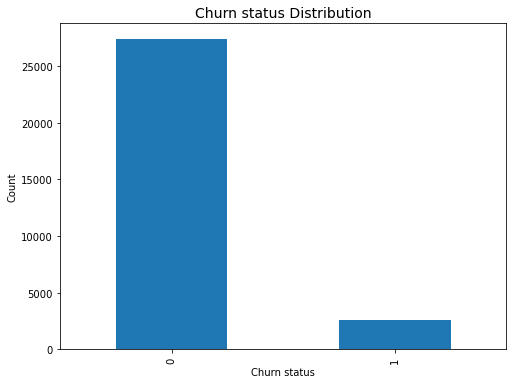

In [57]:
# plotting bar chart

plt.figure(figsize=(8,6))
df['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

#### arpu (Average Revenue per user)

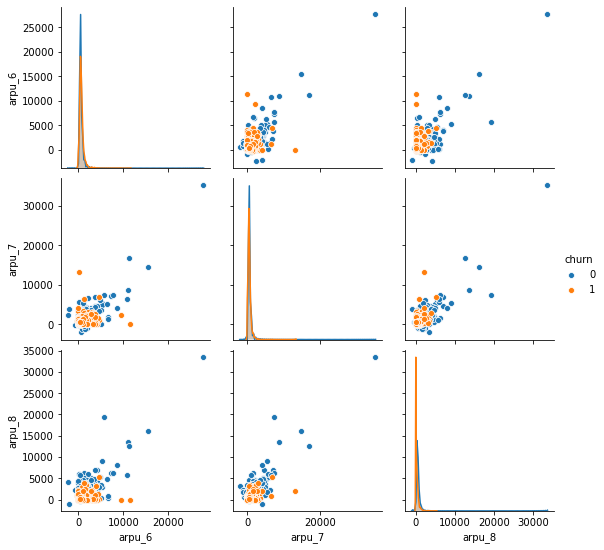

In [58]:
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')

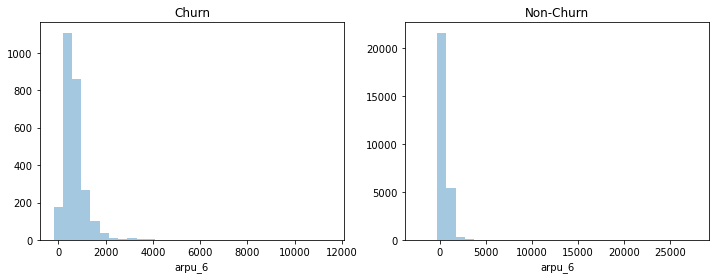

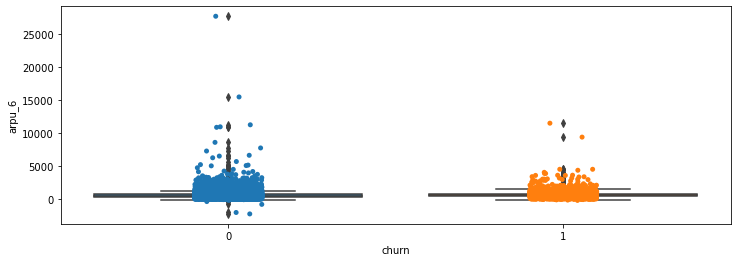

In [59]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='arpu_6', data=df)
sns.stripplot(x='churn', y='arpu_6', data=df, jitter=True, edgecolor="gray")

#### onnet_mou (On network/ within the same network usage)

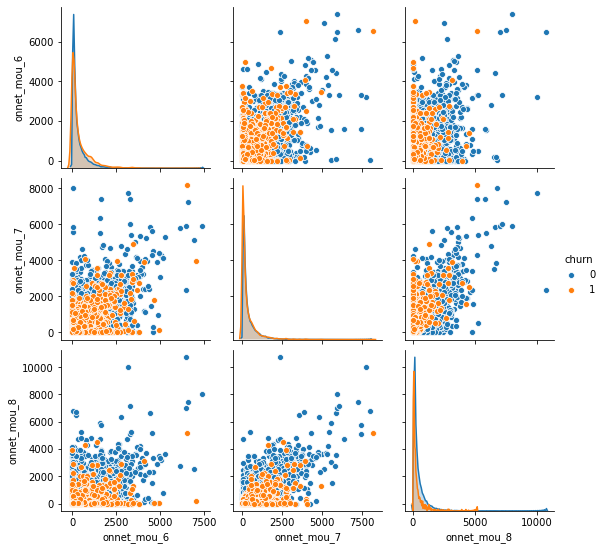

In [60]:
sns.pairplot(data=df[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn')

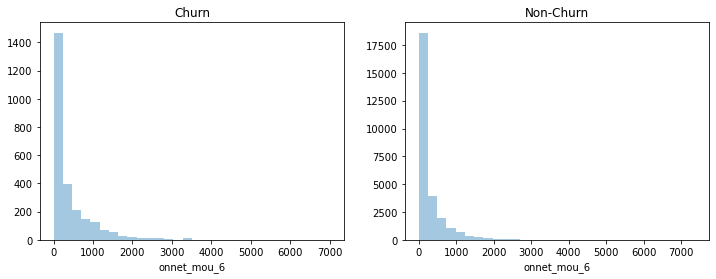

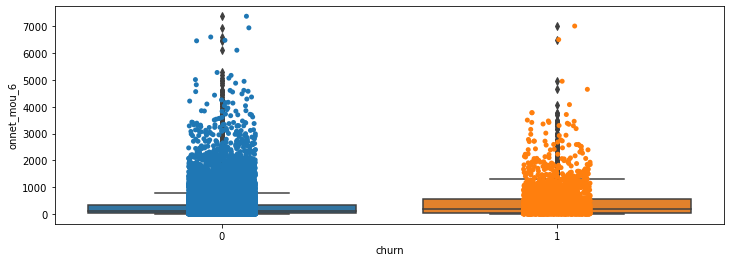

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].onnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].onnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='onnet_mou_6', data=df)
sns.stripplot(x='churn', y='onnet_mou_6', data=df, jitter=True, edgecolor="gray")

#### offnet_mou (Calls outside of the operator network)

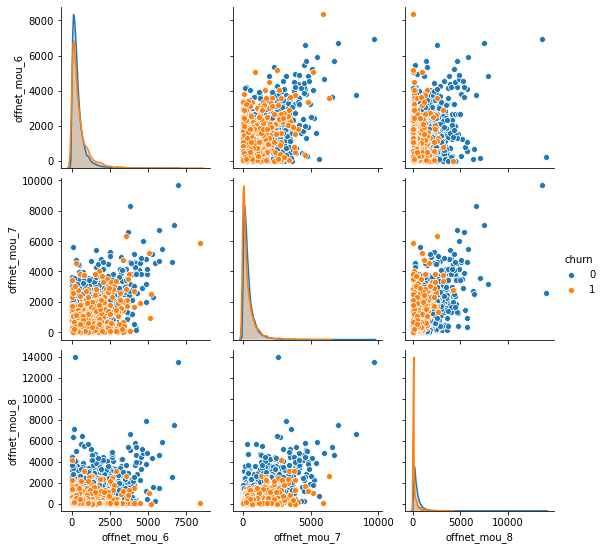

In [62]:
sns.pairplot(data=df[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']],hue='churn')

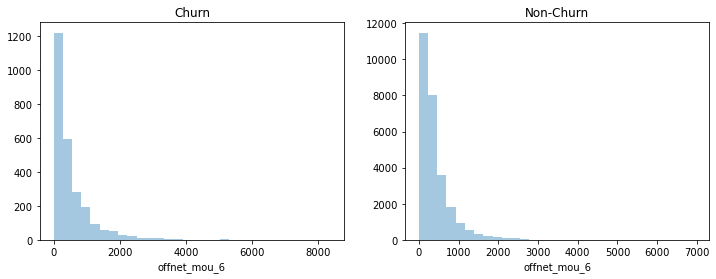

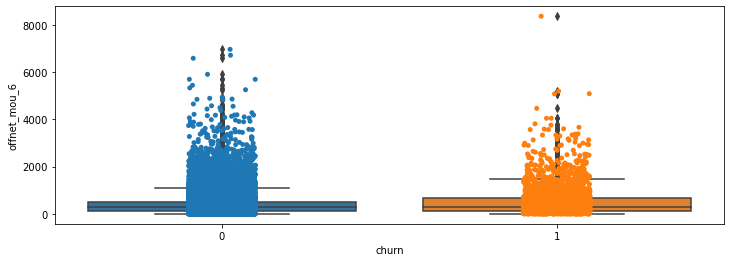

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].offnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].offnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='offnet_mou_6', data=df)
sns.stripplot(x='churn', y='offnet_mou_6', data=df, jitter=True, edgecolor="gray")

#### roam_ic_mou (customer in roaming zone)

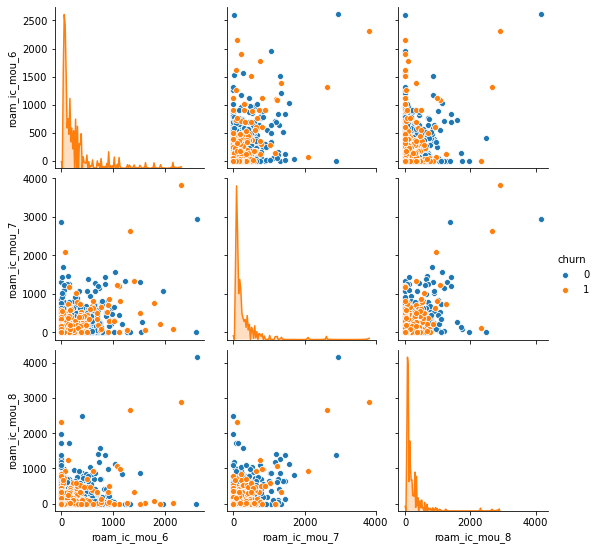

In [64]:
sns.pairplot(data=df[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']],hue='churn')

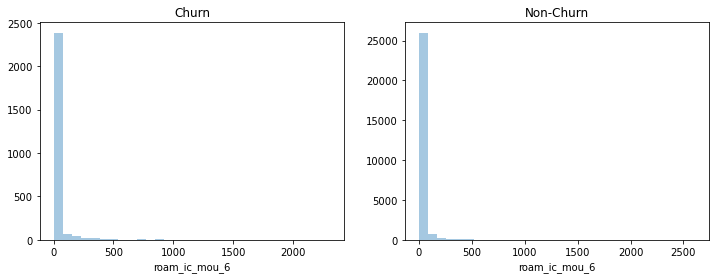

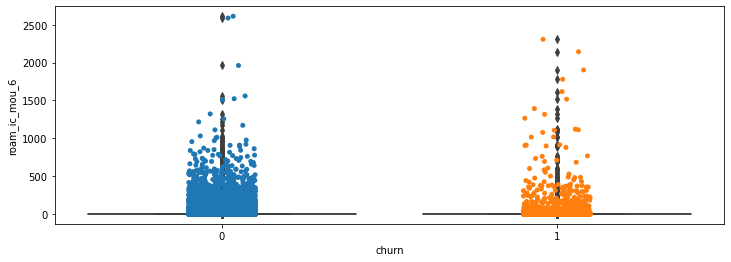

In [65]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].roam_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].roam_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='roam_ic_mou_6', data=df)
sns.stripplot(x='churn', y='roam_ic_mou_6', data=df, jitter=True, edgecolor="gray")

#### loc_og_mou (within the circle outgoing calls)

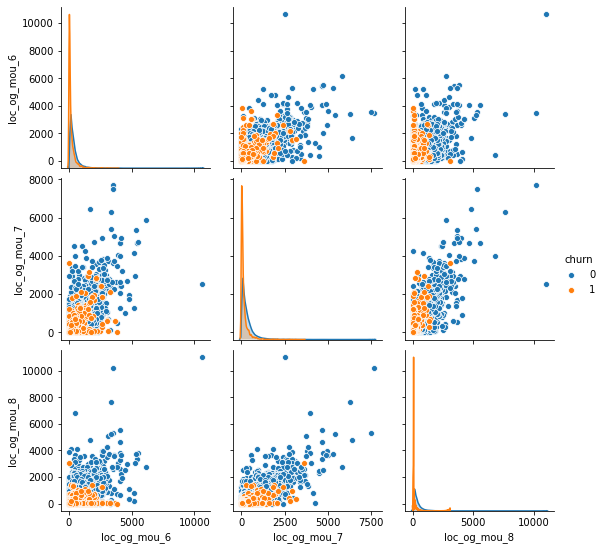

In [66]:
sns.pairplot(data=df[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']],hue='churn')

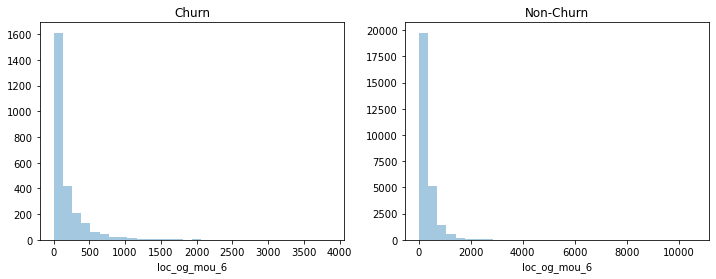

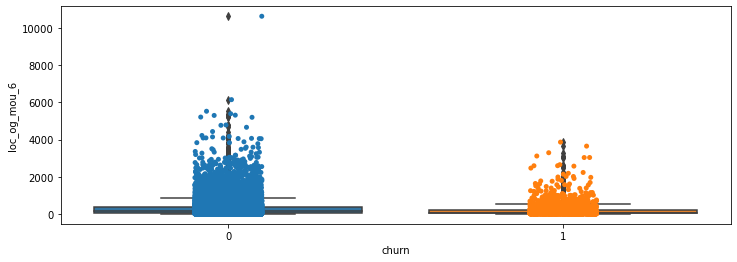

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].loc_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].loc_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='loc_og_mou_6', data=df)
sns.stripplot(x='churn', y='loc_og_mou_6', data=df, jitter=True, edgecolor="gray")

#### std_og_mou (Outside calling circle/zone calls)

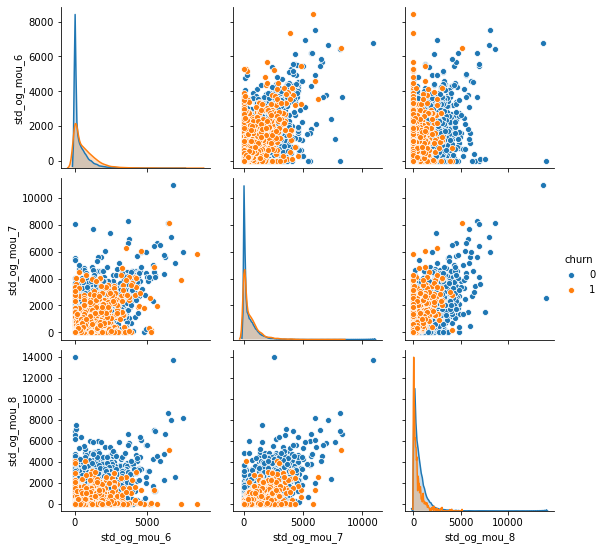

In [68]:
sns.pairplot(data=df[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue='churn')

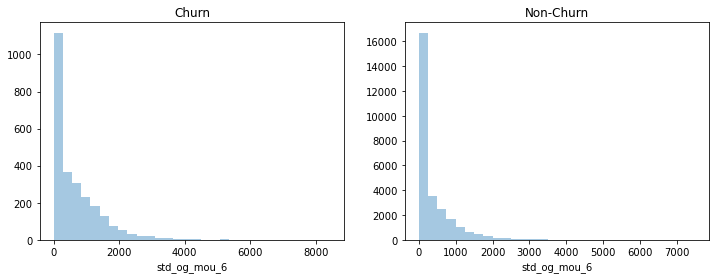

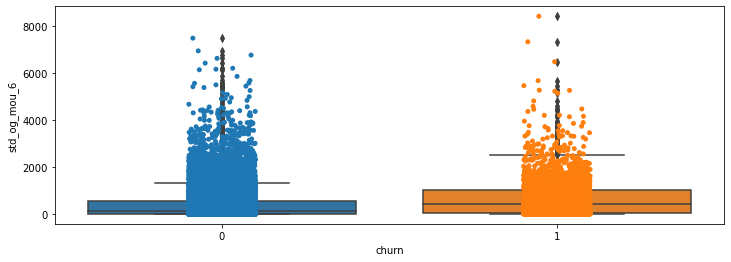

In [69]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].std_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].std_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='std_og_mou_6', data=df)
sns.stripplot(x='churn', y='std_og_mou_6', data=df, jitter=True, edgecolor="gray")

#### isd_og (international calling)

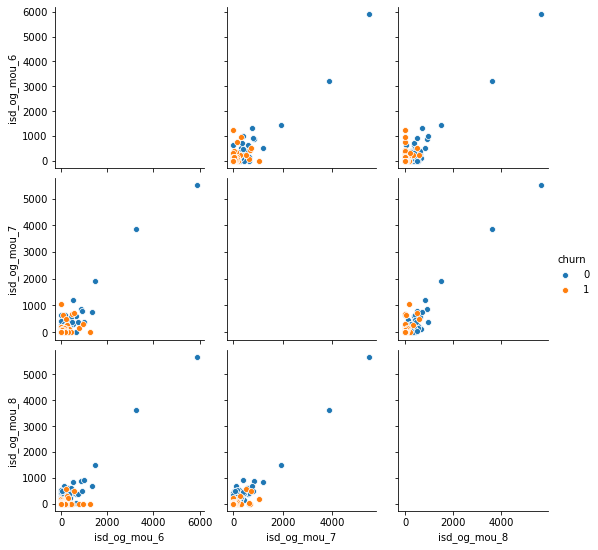

In [70]:
sns.pairplot(data=df[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn']],hue='churn')

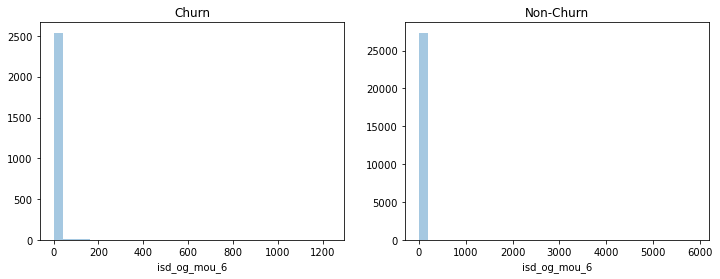

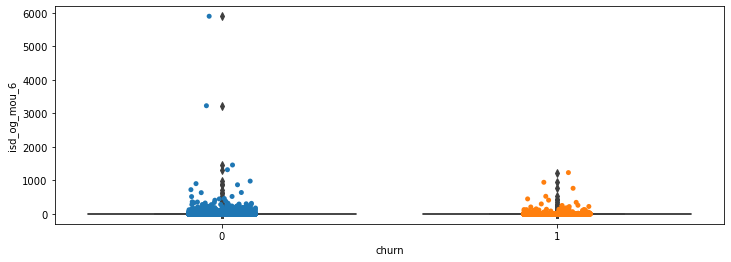

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].isd_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].isd_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='isd_og_mou_6', data=df)
sns.stripplot(x='churn', y='isd_og_mou_6', data=df, jitter=True, edgecolor="gray")

#### totalog (All outgoing calls by the customer)

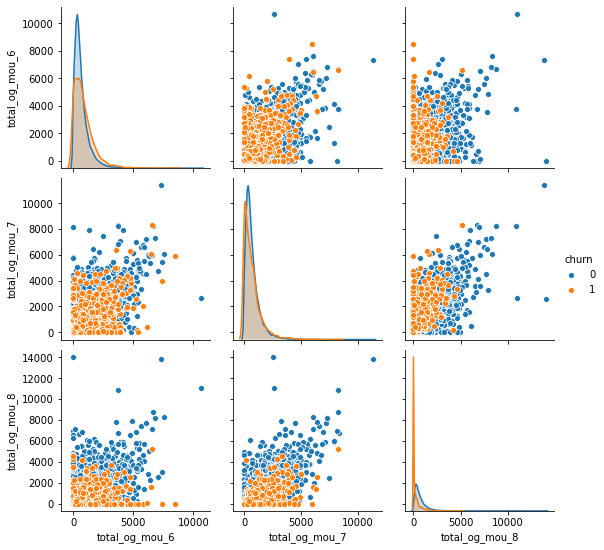

In [72]:
sns.pairplot(data=df[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn')

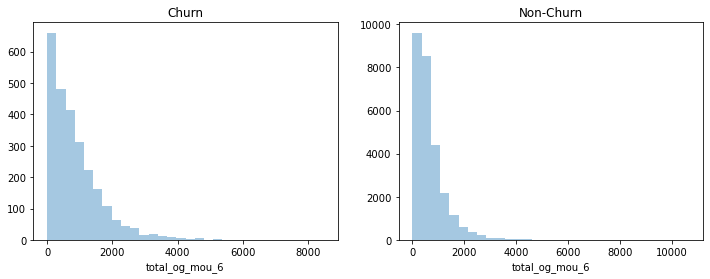

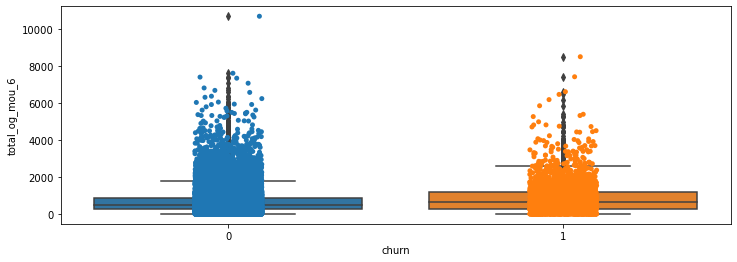

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].total_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].total_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_og_mou_6', data=df)
sns.stripplot(x='churn', y='total_og_mou_6', data=df, jitter=True, edgecolor="gray")

#### loc_ic (incoming local calls)

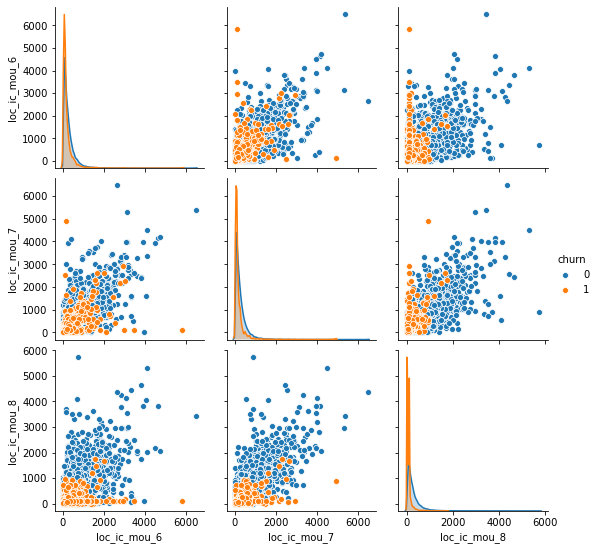

In [74]:
sns.pairplot(data=df[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']],hue='churn')

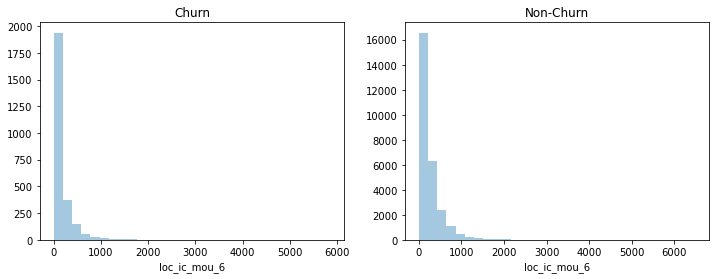

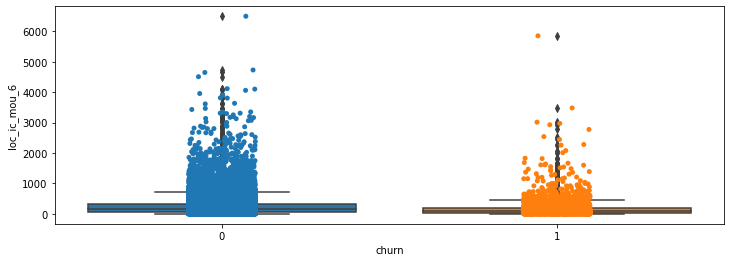

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].loc_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].loc_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='loc_ic_mou_6', data=df)
sns.stripplot(x='churn', y='loc_ic_mou_6', data=df, jitter=True, edgecolor="gray")

#### std_ic (Outside circle incoming calls)

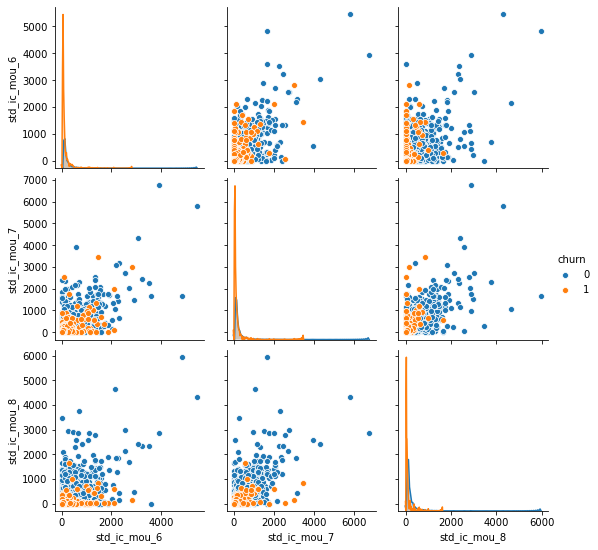

In [76]:
sns.pairplot(data=df[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']],hue='churn')

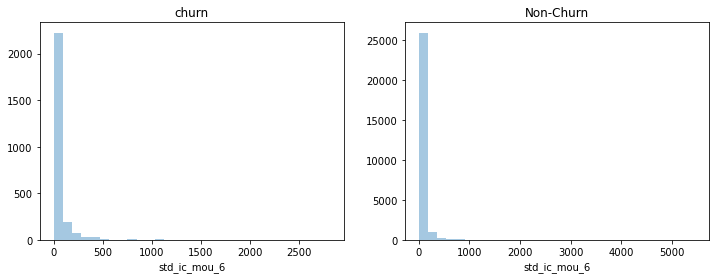

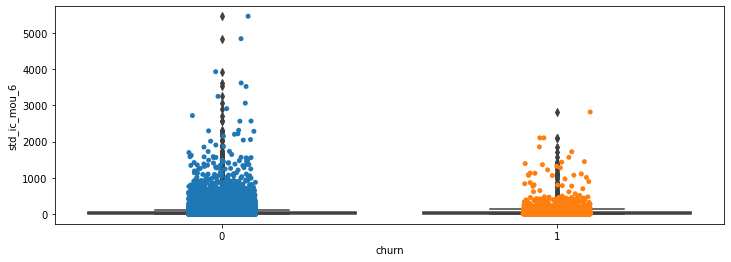

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].std_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('churn')
ax = sns.distplot(df[df['churn']==0].std_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='std_ic_mou_6', data=df)
sns.stripplot(x='churn', y='std_ic_mou_6', data=df, jitter=True, edgecolor="gray")

#### totalic (All incoming calls received by customer)

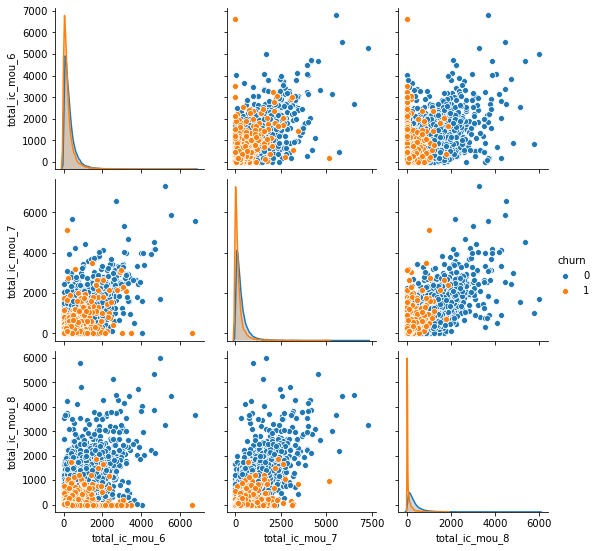

In [78]:
sns.pairplot(data=df[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']],hue='churn')

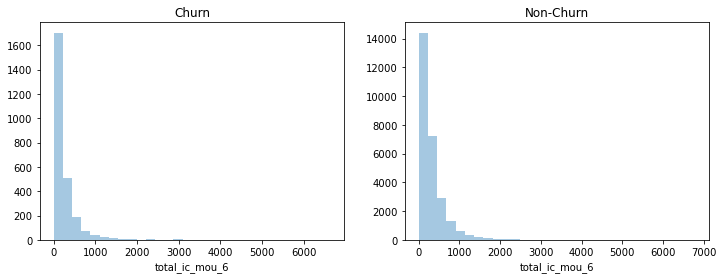

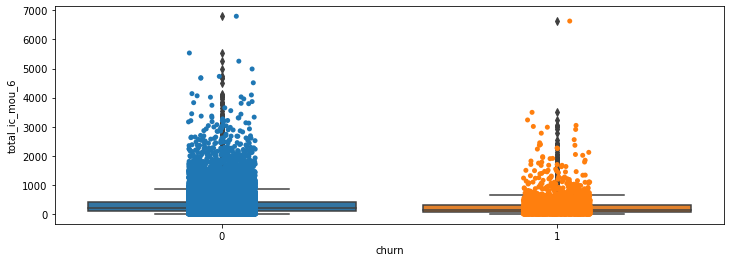

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].total_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].total_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_ic_mou_6', data=df)
sns.stripplot(x='churn', y='total_ic_mou_6', data=df, jitter=True, edgecolor="gray")

#### total_rech_num (Number of times a subscriber recharged his mobile)

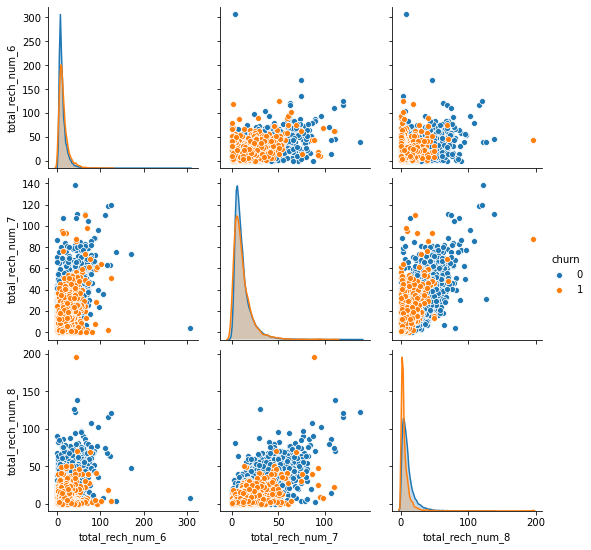

In [80]:
sns.pairplot(data=df[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn']],hue='churn')

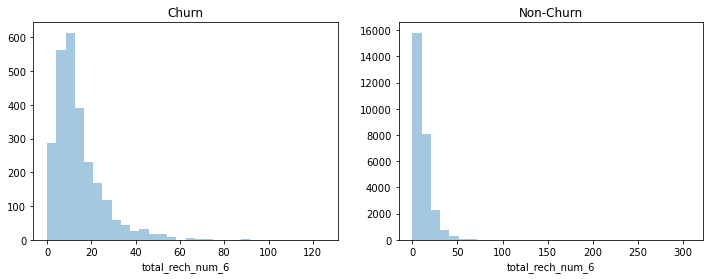

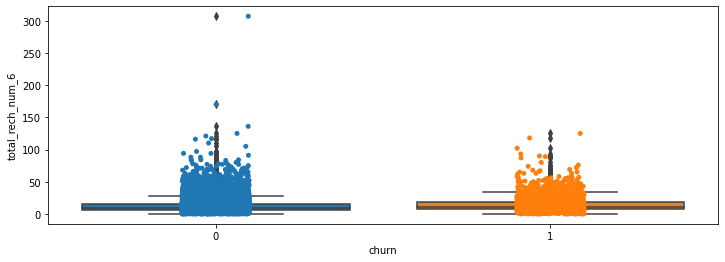

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].total_rech_num_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].total_rech_num_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_rech_num_6', data=df)
sns.stripplot(x='churn', y='total_rech_num_6', data=df, jitter=True, edgecolor="gray")

#### total_rech_data (Total no. of times mobile data is recharged)

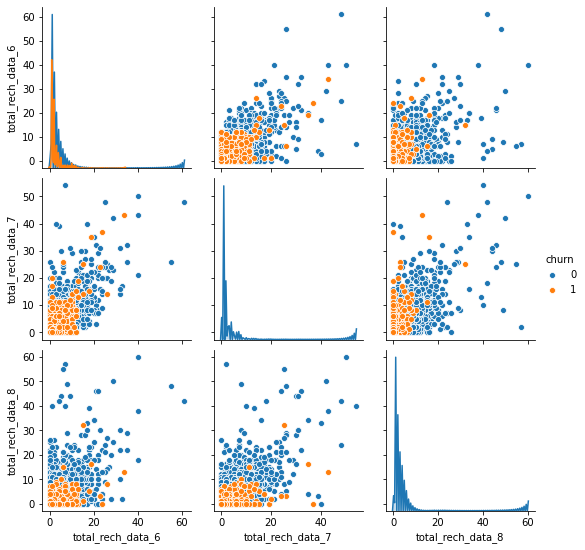

In [82]:
sns.pairplot(data=df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn']],hue='churn')

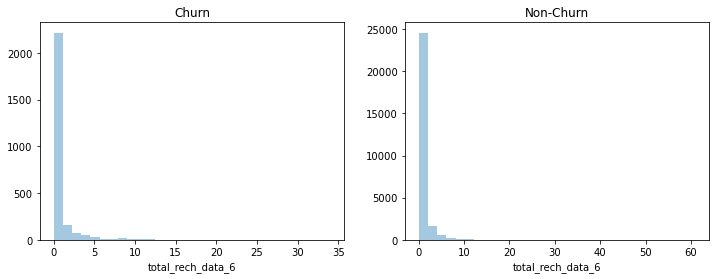

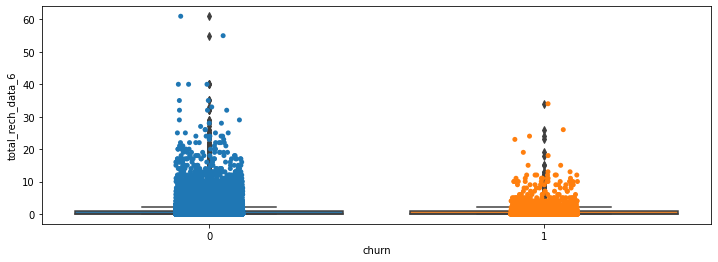

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].total_rech_data_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].total_rech_data_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_rech_data_6', data=df)
sns.stripplot(x='churn', y='total_rech_data_6', data=df, jitter=True, edgecolor="gray")

#### vol_2gmb(Internet usage in MB)

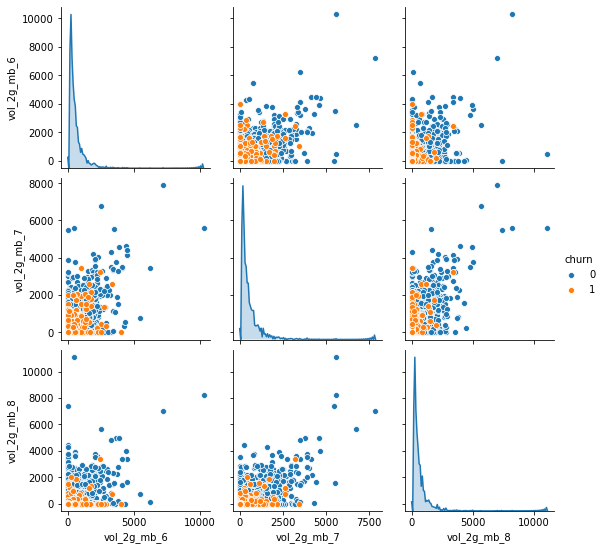

In [84]:
sns.pairplot(data=df[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn']],hue='churn')

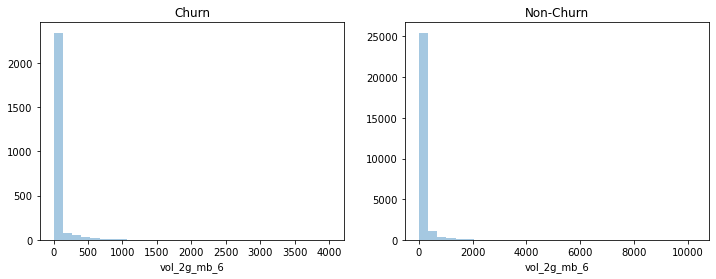

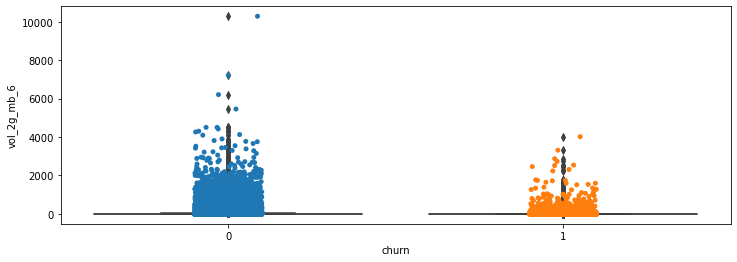

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].vol_2g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].vol_2g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='vol_2g_mb_6', data=df)
sns.stripplot(x='churn', y='vol_2g_mb_6', data=df, jitter=True, edgecolor="gray")

#### vol_3gmb (internet usage in mb)


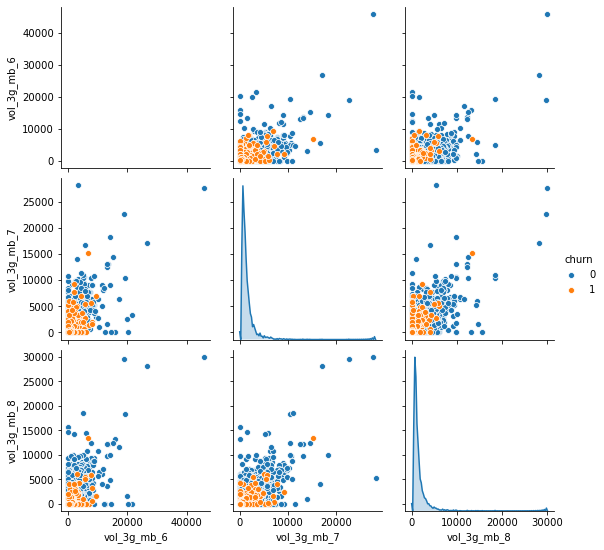

In [86]:
sns.pairplot(data=df[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn']],hue='churn')

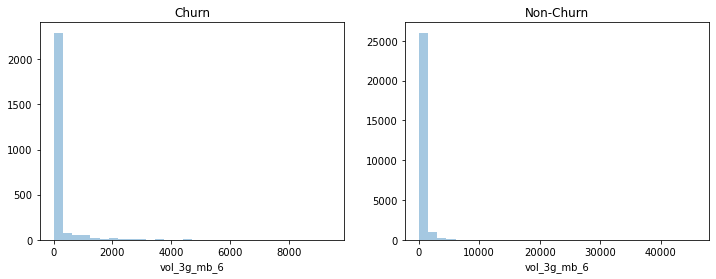

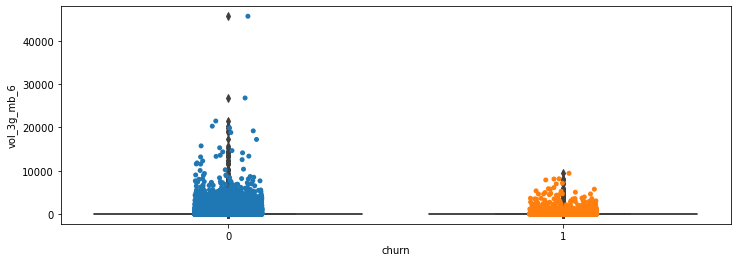

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].vol_3g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].vol_3g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='vol_3g_mb_6', data=df)
sns.stripplot(x='churn', y='vol_3g_mb_6', data=df, jitter=True, edgecolor="gray")

#### vbc3g (volume based cost - paid as per suage)

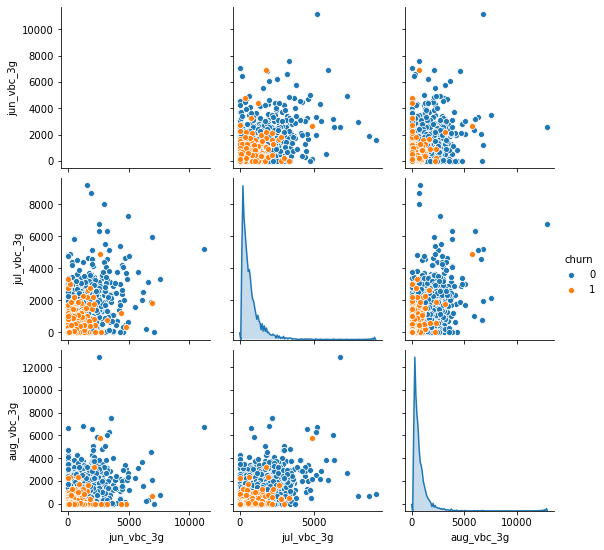

In [88]:
sns.pairplot(data=df[['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','churn']],hue='churn')

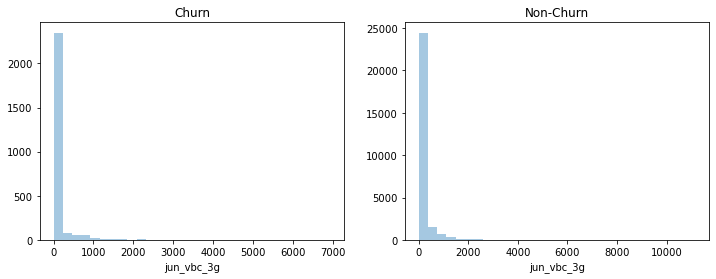

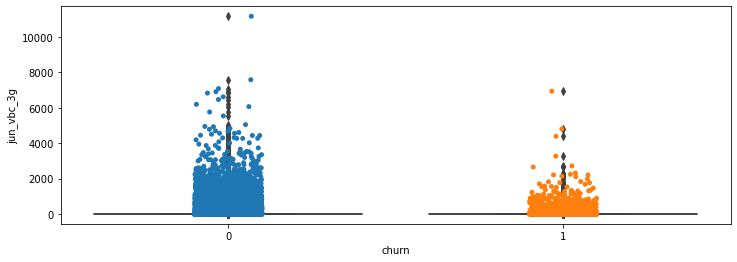

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].jun_vbc_3g, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].jun_vbc_3g, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='jun_vbc_3g', data=df)
sns.stripplot(x='churn', y='jun_vbc_3g', data=df, jitter=True, edgecolor="gray")

#### Observation

- From the above plots as part of EDA, We can see few observations across the features, which have a different behavior. 
- There are outliers present in some of the variables (we'll be dealing with them separately in the below steps)
- If we check the pattern between churn vs non-churn it's same across them and also it's same across the features as well. 

In [90]:
#### checking the correlations between various continuous variables using correlation matrix 

df.corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  \
arpu_6                         1.000000  0.631508  0.570936     0.290722   
arpu_7                         0.631508  1.000000  0.740790     0.140595   
arpu_8                         0.570936  0.740790  1.000000     0.089252   
onnet_mou_6                    0.290722  0.140595  0.089252     1.000000   
onnet_mou_7                    0.142642  0.268903  0.184784     0.719698   
onnet_mou_8                    0.117265  0.216986  0.313206     0.586701   
offnet_mou_6                   0.458633  0.275570  0.209185     0.006302   
offnet_mou_7                   0.259393  0.439379  0.323028    -0.051309   
offnet_mou_8                   0.212504  0.340425  0.489483    -0.041372   
roam_ic_mou_6                  0.109064  0.071378  0.068783     0.005874   
roam_ic_mou_7                  0.069783  0.081054  0.064778     0.010765   
roam_ic_mou_8                  0.077765  0.083927  0.101210     0.030197   
roam_og_mou_6                  0.176864  0.108369  0.106463     0.054505   
roam_og_mou_7                  0.122288  0.161784  0.122724     0.055977   
roam_og_mou_8                  0.107855  0.137785  0.186775     0.055656   
loc_og_t2t_mou_6               0.128773  0.063677  0.064830     0.442180   
loc_og_t2t_mou_7               0.086779  0.120807  0.100072     0.334750   
loc_og_t2t_mou_8               0.085702  0.099425  0.150405     0.293848   
loc_og_t2m_mou_6               0.276095  0.149653  0.155203    -0.038279   
loc_og_t2m_mou_7               0.176581  0.243968  0.212004    -0.073789   
loc_og_t2m_mou_8               0.156930  0.197720  0.307818    -0.071553   
loc_og_t2f_mou_6               0.112281  0.083832  0.096810    -0.059945   
loc_og_t2f_mou_7               0.082545  0.112909  0.109792    -0.069541   
loc_og_t2f_mou_8               0.071693  0.091887  0.135782    -0.070030   
loc_og_t2c_mou_6               0.045239  0.006066  0.000203     0.048564   
loc_og_t2c_mou_7               0.009055  0.040488  0.019582     0.029150   
loc_og_t2c_mou_8               0.004673  0.031220  0.055814     0.035956   
loc_og_mou_6                   0.268605  0.143339  0.148432     0.246936   
loc_og_mou_7                   0.175617  0.242676  0.208363     0.169717   
loc_og_mou_8                   0.159958  0.195191  0.300382     0.139142   
std_og_t2t_mou_6               0.234147  0.110282  0.052826     0.851049   
std_og_t2t_mou_7               0.100035  0.219922  0.140313     0.602529   
std_og_t2t_mou_8               0.074757  0.177755  0.254001     0.485597   
std_og_t2m_mou_6               0.262633  0.148309  0.070639     0.036086   
std_og_t2m_mou_7               0.121411  0.269822  0.168475    -0.010804   
std_og_t2m_mou_8               0.085746  0.201745  0.300468    -0.004629   
std_og_t2f_mou_6               0.051402  0.034583  0.042093    -0.038018   
std_og_t2f_mou_7               0.037332  0.057326  0.055875    -0.040105   
std_og_t2f_mou_8               0.025993  0.035960  0.058458    -0.041247   
std_og_mou_6                   0.338251  0.176380  0.084733     0.598754   
std_og_mou_7                   0.151476  0.334242  0.211119     0.396455   
std_og_mou_8                   0.108405  0.255322  0.373096     0.319362   
isd_og_mou_6                   0.481363  0.427578  0.398361    -0.019373   
isd_og_mou_7                   0.432772  0.523030  0.442738    -0.020610   
isd_og_mou_8                   0.425602  0.464684  0.463293    -0.018153   
spl_og_mou_6                   0.113062  0.055025  0.085397     0.088708   
spl_og_mou_7                   0.050308  0.100760  0.108082     0.062036   
spl_og_mou_8                   0.023421  0.053748  0.089696     0.061913   
og_others_6                    0.086538  0.016933  0.008478     0.091626   
og_others_7                    0.023280  0.025620  0.014141    -0.001031   
og_others_8                    0.014697  0.017311  0.011670    -0.004752   
total_og_mou_6                 0.502760  0.275428  0.193182     0.693990   
total

#### Observation

- As we can see from above, there are multiple features which have high correlation between them
- We'll deal with these while creating individual models separately

### Derived Variable creation

- Here, we would be creating 2 derived variables : 'arpu_diff' & 'onnet_mou_diff'
- 'arpu_diff' is given by (arpu_8 - (arpu_6+arpu_7)/2) and this would help us to identify customer behaviour based on the difference between avg revenue of 8th month(action phase) and mean of avg. revenue during the good phase(i.e. months 6 and7)
- 'onnet_mou_diff' is given by (onnet_mou_8 - (onnet_mou_6+onnet_mou_7)/2) and this would help us to identify customer behaviour based on the difference between all kinds of calls within same operator in 8th month(action phase) and mean of all kinds of calls within same operator in good phase (i.e. months 6 and7)


In [91]:
# creating derived variable : arpu_diff


df['arpu_diff'] = df['arpu_8'] - ((df['arpu_6'] + df['arpu_7'])/2)

In [92]:
# creating derived variable : onnet_mou_diff


df['onnet_mou_diff'] = df['onnet_mou_8'] - ((df['onnet_mou_6'] + df['onnet_mou_7'])/2)

In [93]:
# removing the features which were used to create the above 2 derived features

df = df.drop(['arpu_6','arpu_7','arpu_8',
              'onnet_mou_6','onnet_mou_7','onnet_mou_8'],axis=1)

In [94]:
# checking the shape

df.shape

(29979, 141)

### Oulier Detection & Treatment

In [95]:
# findind all the variables which have outliers using IQR method

outlier_cols = []


for col in df.select_dtypes(exclude='object'):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    l_bound = df[col].quantile(0.25) - 1.5*IQR
    u_bound = df[col].quantile(0.75) + 1.5*IQR
    if ~df[col].between(l_bound,u_bound).all():
        outlier_cols.append(col)

In [96]:
outlier_cols

['offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_i

In [97]:
# chekcing no. of variables which are in outlier_cols

len(outlier_cols)

134

#### Observation

- As we can see from above, we have 134 variables which have outliers

#### Capping outliers in all the outlier_cols

In [98]:
# We will cap our data at the 90% mark (as the Upper_CapValue) and 1% (as the Lower_CapValue) so as to not lose any values or drop rows. 

for item in outlier_cols:
    Upper_CapValue = df[item].quantile(0.90)
    Lower_CapValue = df[item].quantile(0.01)
    df[item][df[item] >= Upper_CapValue] = Upper_CapValue
    df[item][df[item] <= Lower_CapValue] = Lower_CapValue

In [99]:
# checkinf if we still have outliers

outlier_cols = []


for col in df.select_dtypes(exclude='object'):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    l_bound = df[col].quantile(0.25) - 1.5*IQR
    u_bound = df[col].quantile(0.75) + 1.5*IQR
    if ~df[col].between(l_bound,u_bound).all():
        outlier_cols.append(col)

In [100]:
# chekcing no. of variables which are still in outlier_cols

len(outlier_cols)

73

In [101]:
# checking shape

df.shape

(29979, 141)

### Dummy Variables for Categorical variables

In [102]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = df.select_dtypes(include=['object'])

df_categorical = df_categorical.drop(['churn'],1)
df_categorical.head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
7                -1               -1               -1        -1        -1   
8                -1                0                0        -1         1   
13               -1               -1                0        -1        -1   
16               -1               -1               -1        -1        -1   
17               -1               -1               -1        -1        -1   

   fb_user_8  
7         -1  
8          1  
13         1  
16        -1  
17        -1

In [103]:
# subsetting all continuous variables

df_continuous = df.select_dtypes(include=['int64','float64'])
df_continuous.head()

offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43       567.160        325.91          16.23          18.39   
8          94.66        80.630        136.48           0.00           0.00   
13        413.31       119.280        482.46          23.53          18.39   
16        296.29       229.740        162.76           0.00           2.83   
17         61.64         1.099          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7          18.664          23.74          12.59          37.15   
8           0.000           0.00           0.00           0.00   
13         18.664           7.98          35.26           1.44   
16          0.000           0.00          17.74           0.00   
17          4.810           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7             51.390             31.38             40.28            308.63   
8            208.006            207.88             12.49             80.96   
13            49.630              6.19             36.01            151.13   
16            42.610             65.16             67.38            273.29   
17            38.990              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             437.92            162.28             18.38             18.66   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              16.96               0.0               0.0              0.00   
8               0.00               0.0               0.0              4.45   
13             16.96               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00            630.81   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              2.21             2.182              1.73   
8              75.69              0.00             0.000              0.00   
13            156.94              0.00             0.000              0.00   
16             18.29              0.00             0.000              0.00   
17              0.00              0.00             0.000              0.00   

    std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
7          60.86         75.14         77.84           0.0           0.0   
8         130.26        143.48         98.28           0.0           0.0   
13        701.78        138.93        655.18           0.0           0.0   
16         30.89         67.09         21.53           0.0           0.0   
17       1141.36

In [104]:
# convert into dummies

df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

night_pck_user_6_0.0  night_pck_user_6_1.0  night_pck_user_7_0.0  \
7                      0                     0                     0   
8                      0                     0                     1   
13                     0                     0                     0   
16                     0                     0                     0   
17                     0                     0                     0   

    night_pck_user_7_1.0  night_pck_user_8_0.0  night_pck_user_8_1.0  \
7                      0                     0                     0   
8                      0                     1                     0   
13                     0                     1                     0   
16                     0                     0                     0   
17                     0                     0                     0   

    fb_user_6_0.0  fb_user_6_1.0  fb_user_7_0.0  fb_user_7_1.0  fb_user_8_0.0  \
7               0              0              0              0              0   
8               0              0              0              1              0   
13              0              0              0              0              0   
16              0              0              0              0              0   
17              0              0              0              0              0   

    fb_user_8_1.0  
7               0  
8               1  
13              1  
16              0  
17              0

In [105]:
# checking shape of df_dummies

df_dummies.shape

(29979, 12)

In [106]:
# drop categorical variables 

df = df.drop(list(df_categorical.columns), axis=1)

In [107]:
# concat dummy variables with df

df = pd.concat([df, df_dummies], axis=1)

In [108]:
# converting 'churn' into int64 dtype

df['churn'] = df['churn'].astype('int64')

In [109]:
# checking the shape of the latest df

df.shape

(29979, 147)

### Train Test Split

In [110]:
# Import the required library

from sklearn.model_selection import train_test_split

In [111]:
# Split the dataset into 70% train and 30% test


df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling

We'll use MinMax Scaling

In [112]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [113]:
# checking all the continuous variables
list(df_continuous.columns)

['offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_i

In [114]:
# Apply scaler() to all the columns except the 'dummy' variables and target variable

num_vars = list(df_continuous.columns)




df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_train.head()



offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
88105      0.104052      1.000000      1.000000        0.00000            0.0   
34588      0.102380      0.103017      0.110585        0.00000            0.0   
16623      0.493245      0.508166      0.257012        0.00000            0.0   
54904      0.278308      1.000000      1.000000        0.00000            0.0   
33555      1.000000      0.759713      1.000000        0.03146            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
88105            0.0       0.000000            0.0            0.0   
34588            0.0       0.000000            0.0            0.0   
16623            0.0       0.000000            0.0            0.0   
54904            0.0       0.000000            0.0            0.0   
33555            0.0       0.028636            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
88105          0.057258          0.185395          0.189593          0.094243   
34588          0.152592          0.170194          0.074334          0.206747   
16623          0.396527          0.126948          0.060219          0.916612   
54904          0.594021          0.232538          0.209852          0.502017   
33555          0.020480          0.013277          0.007362          0.020282   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
88105          0.038112          0.090603          0.000000          0.000000   
34588          0.209696          0.220297          0.258977          0.296892   
16623          0.958189          0.491532          1.000000          1.000000   
54904          0.298593          0.137992          0.110446          0.000000   
33555          0.046493          0.044151          0.000000          0.000000   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
88105          0.000000               0.0          1.000000           0.05618   
34588          0.139151               0.0          0.000000           0.00000   
16623          0.583137               0.0          0.000000           0.00000   
54904          0.016509               0.0          0.026848           0.00000   
33555          0.000000               0.0          0.000000           0.00000   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
88105      0.098286      0.083939      0.118593          0.000000   
34588      0.191001      0.201734      0.171868          0.023367   
16623      0.774753      0.730959      0.357895          0.000919   
54904      0.519521      0.272165      0.156525          0.129564   
33555      0.019760      0.035147      0.031349          0.000000   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
88105          0.021191          0.027629          0.006522          1.000000   
34588          0.003326          0.004332          0.000000          0.000000   
16623          0.000000          0.000000          0.000000          0.004784   
54904          0.072452          0.030271          0.055331          1.000000   
33555          0.016239          0.055840          1.000000          1.000000   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
88105          1.000000               0.0               0.0               0.0   
34588          0.000395               0.0               0.0               0.0   
16623          0.000000               0.0               0.0               0.0   
54904          1.000000               0.0               0.0               0.0   
33555          1.000000               0.0               0.0               0.0   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
88105      0.010198      1.000000      1.000000           0.0           0.0   
34588      0.012914      0.001877      0.002534           0.0           0.0   
16623      0.00050

### Dividing into X and Y sets for the model building

In [115]:
y_train = df_train.pop('churn')
X_train = df_train

In [116]:
y_test = df_test.pop('churn')
X_test = df_test

### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [117]:
# Looking at the correlation table

df.corr()

offnet_mou_6  offnet_mou_7  offnet_mou_8  \
offnet_mou_6                       1.000000      0.697580      0.572927   
offnet_mou_7                       0.697580      1.000000      0.759205   
offnet_mou_8                       0.572927      0.759205      1.000000   
roam_ic_mou_6                      0.006973      0.044281      0.071983   
roam_ic_mou_7                      0.045039      0.007604      0.008340   
roam_ic_mou_8                      0.052587      0.048283      0.006025   
roam_og_mou_6                      0.022071      0.051515      0.080239   
roam_og_mou_7                      0.058524      0.018941     -0.000420   
roam_og_mou_8                      0.063493      0.066238      0.023511   
loc_og_t2t_mou_6                   0.154826      0.065456      0.103883   
loc_og_t2t_mou_7                   0.097603      0.144462      0.164183   
loc_og_t2t_mou_8                   0.090485      0.125890      0.253569   
loc_og_t2m_mou_6                   0.461795      0.287399      0.295904   
loc_og_t2m_mou_7                   0.338922      0.446936      0.395911   
loc_og_t2m_mou_8                   0.291172      0.346086      0.534009   
loc_og_t2f_mou_6                   0.109767      0.054207      0.090474   
loc_og_t2f_mou_7                   0.064042      0.095645      0.113970   
loc_og_t2f_mou_8                   0.057452      0.075418      0.171887   
loc_og_t2c_mou_6                   0.064132      0.029306      0.009066   
loc_og_t2c_mou_7                   0.012611      0.062315      0.031411   
loc_og_t2c_mou_8                   0.023366      0.058412      0.103201   
loc_og_mou_6                       0.386260      0.222989      0.244176   
loc_og_mou_7                       0.271355      0.369777      0.339810   
loc_og_mou_8                       0.235222      0.287590      0.472962   
std_og_t2t_mou_6                  -0.030855     -0.084254     -0.089868   
std_og_t2t_mou_7                  -0.109226     -0.025567     -0.038706   
std_og_t2t_mou_8                  -0.085170     -0.011084      0.066614   
std_og_t2m_mou_6                   0.705917      0.523740      0.385422   
std_og_t2m_mou_7                   0.495421      0.731583      0.522946   
std_og_t2m_mou_8                   0.411959      0.584654      0.709974   
std_og_t2f_mou_6                   0.070726      0.036677      0.061192   
std_og_t2f_mou_7                   0.041679      0.063744      0.078138   
std_og_t2f_mou_8                   0.038157      0.054792      0.115639   
std_og_mou_6                       0.427978      0.271997      0.174247   
std_og_mou_7                       0.239978      0.447079      0.304835   
std_og_mou_8                       0.195039      0.351187      0.472555   
isd_og_mou_6                            NaN           NaN           NaN   
isd_og_mou_7                            NaN           NaN           NaN   
isd_og_mou_8                            NaN           NaN           NaN   
spl_og_mou_6                       0.119602      0.045472      0.011717   
spl_og_mou_7                       0.042877      0.114511      0.059286   
spl_og_mou_8                       0.048918      0.107461      0.172770   
og_others_6                        0.076093      0.001300     -0.014962   
og_others_7                             NaN           NaN           NaN   
og_others_8                             NaN           NaN           NaN   
total_og_mou_6                     0.665531      0.407910      0.320229   
total_og_mou_7                     0.404375      0.667951      0.503692   
total_og_mou_8                     0.323477      0.496904      0.716771   
loc_ic_t2t_mou_6                   0.110398      0.026031      0.057998   
loc_ic_t2t_mou_7                   0.058865      0.093349      0.111472   
loc_ic_t2t_mou_8                   0.046236      0.074051      0.180444   
loc_ic_t2m_mou_6                   0.270913      0.147901      0.169072   
loc_ic_t2m_mou_7                   0.201191      0.25082

## First Model without using PCA - Random Forest

- We would be building Random Forest Model for better interpretability of results to the business since Random Forest provides with feature_importances attribute which would help help us in finding top 10 predictors for the target variable 'churn'



In [118]:
# importing required modules

from sklearn.ensemble import RandomForestClassifier

In [119]:
# instantiating object of RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, class_weight='balanced', max_depth=4, max_features=5, random_state=100, oob_score=True)

In [120]:
# model fitting on train data


rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       n_estimators=10, oob_score=True, random_state=100)

In [121]:
# out of bag score

rf.oob_score_

0.854991660710031

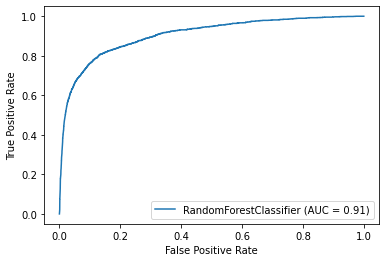

In [122]:
# plot ROC Curve

from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [123]:
# instantiating object of RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced',n_jobs=-1)

#### Observation

- class_weight = 'balanced' is a parameter provided in all the classification models and it is very important to use this.
- This ensures that the class imbalance that we have in the target variable is handled and we get the desired results

In [124]:
# setting parameters for GridSearchCV

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

### The performance metric that we would be using in all the classification models is Recall/Sensitivity as we want to correctly predict our churned customers as churned, otherwise this would primarily mean losing out a HVC, thus resulting in a huge revenue loss to the business 

In [125]:
# GridSearchCv

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [126]:

%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.1min finished


Wall time: 4min 3s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [127]:
# grid_search best score 

grid_search.best_score_

0.7796084741626502

In [128]:
# finding the best estimator

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=100, n_estimators=10, n_jobs=-1,
                       random_state=42)

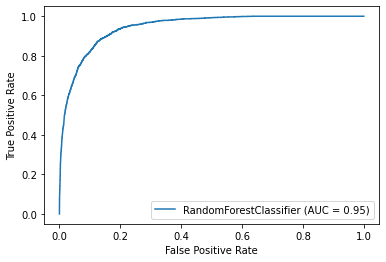

In [129]:
#plot roc curve

plot_roc_curve(rf_best, X_train, y_train)
plt.show()

#### Observation

- we got AUC score = 0.95

In [130]:
# finding y_train_pred and y_test_pred

y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [131]:
# checking accuracy/recall on train data

from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     19211
           1       0.45      0.81      0.57      1774

    accuracy                           0.90     20985
   macro avg       0.71      0.86      0.76     20985
weighted avg       0.94      0.90      0.91     20985



#### Observation (Train Data)

- Accuracy(90%)
- Recall for churned customers having value 1 (81%)

In [132]:
# checking accuracy/recall on test data

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8179
           1       0.45      0.77      0.57       815

    accuracy                           0.89      8994
   macro avg       0.71      0.84      0.75      8994
weighted avg       0.93      0.89      0.91      8994



## First Model - Random Forest without PCA Results (Test Data)

- Accuracy(89%)
- Recall (77%)

In [133]:
# best features with weights

rf_best.feature_importances_

array([2.12487552e-03, 2.24363583e-03, 2.15253561e-03, 1.33179222e-17,
       4.79760956e-03, 2.41940774e-02, 7.70768229e-04, 2.21055339e-03,
       4.08697792e-02, 1.71757404e-03, 2.33954250e-03, 5.35203876e-03,
       3.81063597e-03, 3.13132621e-03, 6.23246996e-02, 5.56695435e-04,
       8.68385886e-04, 6.57374077e-02, 0.00000000e+00, 1.10915534e-04,
       3.12205205e-04, 1.29825908e-03, 2.69847272e-03, 1.32542213e-02,
       8.53529857e-04, 5.42377651e-03, 1.80184506e-03, 2.13358514e-03,
       5.39621669e-04, 3.68422484e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.03370587e-03, 2.31808013e-03, 4.57351335e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.37654122e-04,
       1.54137385e-03, 3.06438246e-03, 2.91509236e-04, 0.00000000e+00,
       0.00000000e+00, 3.15346932e-03, 5.40691558e-03, 1.03129790e-01,
       6.64690152e-04, 2.00483198e-03, 2.22874903e-02, 5.33137270e-03,
       1.46160674e-03, 4.31473424e-02, 1.43609040e-03, 1.62252645e-02,
      

In [134]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [135]:
imp_df.sort_values(by="Imp", ascending=False)

Varname           Imp
87                total_rech_amt_8  1.323737e-01
47                  total_og_mou_8  1.031298e-01
74                  total_ic_mou_8  7.588190e-02
132                      arpu_diff  7.212177e-02
17                loc_og_t2f_mou_8  6.573741e-02
14                loc_og_t2m_mou_8  6.232470e-02
56                loc_ic_t2f_mou_8  4.376517e-02
53                loc_ic_t2m_mou_8  4.314734e-02
8                    roam_og_mou_8  4.086978e-02
65                std_ic_t2m_mou_8  2.636941e-02
71                    std_ic_mou_8  2.480267e-02
5                    roam_ic_mou_8  2.419408e-02
50                loc_ic_t2t_mou_8  2.228749e-02
133                 onnet_mou_diff  1.666933e-02
86                total_rech_num_8  1.663196e-02
55                loc_ic_t2f_mou_7  1.622526e-02
93              last_day_rch_amt_8  1.578892e-02
23                    loc_og_mou_8  1.325422e-02
59                    loc_ic_mou_8  1.247649e-02
62                std_ic_t2t_mou_8  1.049491e-02
99                 max_rech_data_8  8.430227e-03
128                     aug_vbc_3g  6.929245e-03
58                    loc_ic_mou_7  5.980397e-03
25                std_og_t2t_mou_7  5.423777e-03
46                  total_og_mou_7  5.406916e-03
11                loc_og_t2t_mou_8  5.352039e-03
51                loc_ic_t2m_mou_6  5.331373e-03
89                  max_rech_amt_7  4.910368e-03
4                    roam_ic_mou_7  4.797610e-03
35                    std_og_mou_8  4.573513e-03
90                  max_rech_amt_8  3.901507e-03
12                loc_og_t2m_mou_6  3.810636e-03
29                std_og_t2m_mou_8  3.684225e-03
111                    vol_2g_mb_8  3.470960e-03
127                            aon  3.342500e-03
57                    loc_ic_mou_6  3.166245e-03
45                  total_og_mou_6  3.153469e-03
13                loc_og_t2m_mou_7  3.131326e-03
41                    spl_og_mou_8  3.064382e-03
33                    std_og_mou_6  3.033706e-03
22                    loc_og_mou_7  2.698473e-03
88                  max_rech_amt_6  2.687008e-03
72                  total_ic_mou_6  2.372572e-03
10                loc_og_t2t_mou_7  2.339542e-03
34                    std_og_mou_7  2.318080e-03
108             av_rech_amt_data_8  2.292710e-03
1                     offnet_mou_7  2.243636e-03
7                    roam_og_mou_7  2.210553e-03
2                     offnet_mou_8  2.152536e-03
27                std_og_t2m_mou_6  2.133585e-03
0                     offnet_mou_6  2.124876e-03
61                std_ic_t2t_mou_7  2.015781e-03
49                loc_ic_t2t_mou_7  2.004832e-03
98                 max_rech_data_7  1.954515e-03
131  total_rech_amt_good_phase_avg  1.944489e-03
26                std_og_t2t_mou_8  1.801845e-03
9                 loc_og_t2t_mou_6  1.717574e-03
114                    vol_3g_mb_8  1.658308e-03
40                    spl_og_mou_7  1.541374e-03
52                loc_ic_t2m_mou_7  1.461607e-03
54                loc_ic_t2f_mou_6  1.436090e-03
145                  fb_user_8_1.0  1.423918e-03
68                std_ic_t2f_mou_8  1.421247e-03
106             av_rech_amt_data_6  1.327133e-03
91              last_day_rch_amt_6  1.320273e-03
109                    vol_2g_mb_6  1.318290e-03
21                    loc_og_mou_6  1.298259e-03
85                total_rech_num_7  1.148731e-03
92              last_day_rch_amt_7  1.058585e-03
69                    std_ic_mou_6  1.009976e-03
96               total_rech_data_8  9.786612e-04
70                    std_ic_mou_7  8.898732e-04
73                  total_ic_mou_7  8.713109e-04
16                loc_og_t2f_mou_7  8.683859e-04
24                std_og_t2t_mou_6  8.535299e-04
66                std_ic_t2f_mou_6  8.312715e-04
6                    roam_og_mou_6  7.707682e-04
39                    spl_og_mou_6  7.376541e-04
97                 max_rech_data_6  7.180408e-04
84                total_rech_num_6  6.768671e-04
48                loc_ic_t2t_mou_6  6.646902e-04
138      

### First Model - Top 10 predictors after using Random Forest Modelling technique

- total_rech_amt_8
- total_og_mou_8
- total_ic_mou_8
- arpu_diff
- loc_og_t2f_mou_8
- loc_og_t2m_mou_8
- loc_ic_t2f_mou_8
- loc_ic_t2m_mou_8
- roam_og_mou_8
- std_ic_t2m_mou_8


The above listed features are the most important features (based on feature importances in descending order) that the business could focus upon.

## Building Second Model using PCA - Logistic Regression

- We would be building Logistic Regression Model using PCA for achieving high performance of our performance metric i.e. Recall
- Since, we would be using PCA, the model won't be much interpretable but we should get good results after using PCA
- The high performing models can be used for deployment purpose 

### PCA on the data

- We will calculate the Principal Components using the train data, and apply them later on the test data

In [136]:
# checing shape of X_train

X_train.shape

(20985, 146)

In [137]:
# importing PCA module

from sklearn.decomposition import PCA

In [138]:
# instantiating PCA

pca = PCA(random_state=42)

In [139]:
# fitting pca

pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [140]:
# chekcing the principal components

pca.components_

array([[-2.85674621e-02, -3.00352248e-02, -1.54559894e-02, ...,
         2.33492222e-01, -9.83673513e-03,  2.26095847e-01],
       [ 7.66928218e-02,  7.75605197e-02,  9.33484959e-02, ...,
        -8.29175811e-02,  7.85841724e-03, -6.42445676e-02],
       [ 1.24563788e-01,  1.58975151e-01,  1.70378376e-01, ...,
         3.72221821e-02,  5.42146994e-02,  6.54219060e-02],
       ...,
       [-0.00000000e+00, -7.64254149e-17,  7.46977476e-17, ...,
        -1.48217353e-04,  3.08418051e-04,  3.08418051e-04],
       [ 0.00000000e+00,  1.01708962e-16, -9.91141904e-17, ...,
        -4.27301909e-04, -1.75629641e-03, -1.75629641e-03],
       [-0.00000000e+00, -1.51180139e-17,  1.50748671e-16, ...,
        -3.52043408e-04, -5.13798641e-04, -5.13798641e-04]])

In [141]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2        Feature
0 -0.028567  0.076693   offnet_mou_6
1 -0.030035  0.077561   offnet_mou_7
2 -0.015456  0.093348   offnet_mou_8
3  0.000435 -0.008759  roam_ic_mou_6
4 -0.004715 -0.018242  roam_ic_mou_7

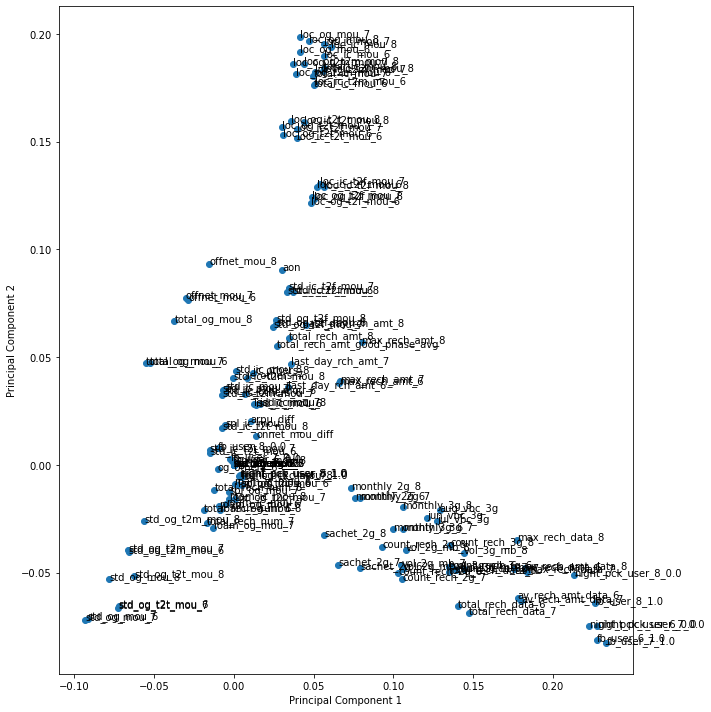

In [142]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

Looking at the explained variance ratio for each component

In [143]:
# Looking at the explained variance ratio for each component

pca.explained_variance_ratio_

array([1.95742072e-01, 1.12028106e-01, 6.91941465e-02, 5.12029890e-02,
       3.77088316e-02, 2.85103543e-02, 2.58164710e-02, 2.33361140e-02,
       2.26280765e-02, 2.04359328e-02, 2.01488760e-02, 1.96116471e-02,
       1.86345812e-02, 1.67252413e-02, 1.55065004e-02, 1.35533742e-02,
       1.28079965e-02, 1.20323476e-02, 1.16620997e-02, 1.10398892e-02,
       1.02000384e-02, 9.23329943e-03, 8.76897227e-03, 7.76497968e-03,
       7.54719267e-03, 7.42801207e-03, 7.01808591e-03, 6.89359492e-03,
       6.58583886e-03, 6.34814070e-03, 6.31810585e-03, 6.03394761e-03,
       5.64139193e-03, 5.42200722e-03, 5.38908874e-03, 5.22767508e-03,
       4.99977313e-03, 4.96952211e-03, 4.94658545e-03, 4.48969486e-03,
       4.28687689e-03, 4.19487138e-03, 3.98732925e-03, 3.92703220e-03,
       3.79640689e-03, 3.75347088e-03, 3.58235996e-03, 3.51835820e-03,
       3.33912952e-03, 3.24009022e-03, 3.19352805e-03, 3.08021774e-03,
       3.02577280e-03, 2.97439902e-03, 2.83184236e-03, 2.73028082e-03,
      

#### Making a scree plot for the explained variance

In [144]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

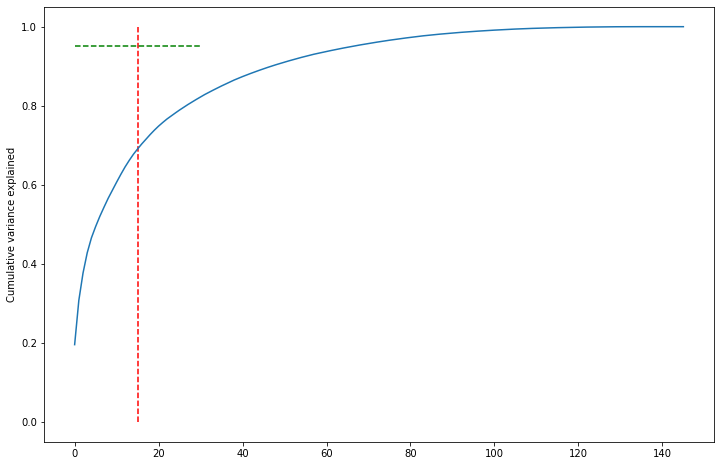

In [145]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Observation

- As we can see from the above scree plot, the no of Principal Components are around 48 for cumulative variance explained of 0.9

#### Taking the explained variance ratio as 90% and passing it as a paramter while instantiating the object of PCA()

In [146]:
# imoorting module IncrementalPCA

from sklearn.decomposition import IncrementalPCA

In [147]:
# instantiating PCA

pca_again = PCA(0.90, random_state=42)

In [148]:
# pca fit on train data

df_train_pca = pca_again.fit_transform(X_train)

In [149]:
# checking shape of df_train_pca

df_train_pca.shape

(20985, 48)

In [150]:
# pca transform on test data

df_test_pca = pca_again.transform(X_test)

In [151]:
# checking shape of df_test_pca

df_test_pca.shape

(8994, 48)

#### Building Logistic Regression Model using PCA 

In [152]:
# import required module and creatig object

from sklearn.linear_model import LogisticRegression

log_reg_pca = LogisticRegression(random_state= 42, class_weight='balanced')

In [153]:
model_log_reg_pca = log_reg_pca.fit(df_train_pca, y_train)

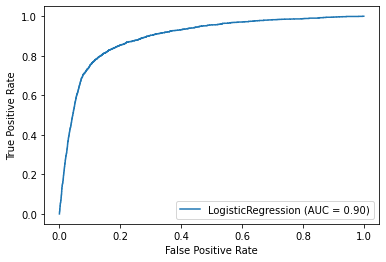

In [154]:
# plot roc curve

plot_roc_curve(model_log_reg_pca, df_train_pca, y_train)
plt.show()


#### Observation

- AUC Score =90%

In [155]:
# finding y_train_pred and y_test_pred

y_train_pred_pca = model_log_reg_pca.predict(df_train_pca)
y_test_pred_pca = model_log_reg_pca.predict(df_test_pca)

In [156]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     19211
           1       0.32      0.83      0.46      1774

    accuracy                           0.84     20985
   macro avg       0.65      0.83      0.68     20985
weighted avg       0.93      0.84      0.87     20985



#### Observation (Train Data)

- Accuracy (84%)
- Recall (83%)

In [157]:
print(classification_report(y_test, y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8179
           1       0.33      0.82      0.47       815

    accuracy                           0.83      8994
   macro avg       0.65      0.83      0.69      8994
weighted avg       0.92      0.83      0.86      8994



## Second Model - Logistic Regression Model with PCA Results (Test Data)

- Accuracy(83%)
- Recall (82%)

## Building Third Model using PCA - Random Forest

- We would be building Random Forest Model using PCA for achieving high performance of our performance metric i.e. Recall
- Since, we would be using PCA, the model won't be much interpretable but we should get good results after using PCA
- The high performing models can be used for deployment purpose 

#### Building Random Forest Model with PCA (along with Hyper Parameter Tuning)

In [158]:
rf_pca = RandomForestClassifier(random_state=42, class_weight='balanced',n_jobs=-1)

In [159]:
params = {
    'max_depth': [3,4,5,10],
    'min_samples_leaf': [100,125,150,200,250],
    'n_estimators': [10, 20, 50, 100]
}

In [160]:
grid_search = GridSearchCV(estimator=rf_pca,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [161]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.9min finished


Wall time: 2min 52s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 10],
                         'min_samples_leaf': [100, 125, 150, 200, 250],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [162]:
grid_search.best_score_

0.7638211010107172

In [163]:

rf_pca_best = grid_search.best_estimator_
rf_pca_best

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=250, n_estimators=50, n_jobs=-1,
                       random_state=42)

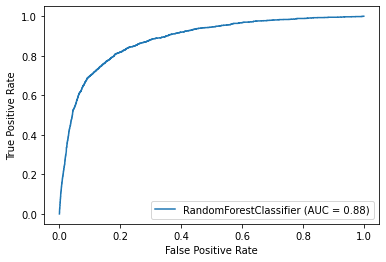

In [164]:
# plot roc curve

plot_roc_curve(rf_pca_best, df_train_pca, y_train)
plt.show()

#### Observation

- AUC Score(0.88)

In [165]:
# finding y_train_pred and y_test_pred

y_train_pred_pca = rf_pca_best.predict(df_train_pca)
y_test_pred_pca = rf_pca_best.predict(df_test_pca)

In [166]:
print(classification_report(y_train, y_train_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     19211
           1       0.30      0.78      0.44      1774

    accuracy                           0.83     20985
   macro avg       0.64      0.81      0.67     20985
weighted avg       0.92      0.83      0.86     20985



#### Observation (Train Data)

- Accuracy(83%)
- Recall (0.78)

In [167]:
print(classification_report(y_test, y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      8179
           1       0.32      0.78      0.45       815

    accuracy                           0.83      8994
   macro avg       0.65      0.81      0.68      8994
weighted avg       0.92      0.83      0.86      8994



## Third Model - RandomForestClassifier Model with PCA Results (Test Data)

- Accuracy(83%)
- Recall (0.78)

## Building Fourth Model using PCA - XGBoost

- We would be building XGBoost Model using PCA for achieving high performance of our performance metric i.e. Recall
- Since, we would be using PCA, the model won't be much interpretable but we should get good results after using PCA
- The high performing models can be used for deployment purpose

### Building XGBoostClassifier Model with PCA (Along with HyperParameter Tuning)

In [168]:
# importing required libraries

from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [169]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 4

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6],
             'scale_pos_weight' : [45,50]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200, random_state=42,n_jobs=-1)

# set up GridSearchCV()
grid_search = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [170]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  1.2min finished


Wall time: 1min 17s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=-1,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, valida

In [171]:
grid_search.best_score_

0.8810767596038476

In [172]:
xg_best = grid_search.best_estimator_
xg_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=50, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

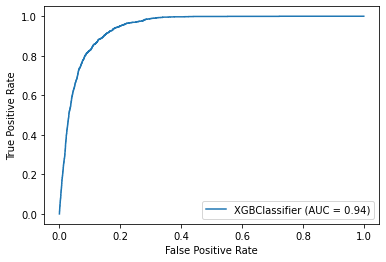

In [173]:
# plot roc curve

plot_roc_curve(xg_best, df_train_pca, y_train)
plt.show()

#### Observation

- AUC SCORE(0.94)

In [174]:
# finding y_train_pred and y_test_pred

y_train_pred_pca = xg_best.predict(df_train_pca)
y_test_pred_pca = xg_best.predict(df_test_pca)

In [175]:
print(classification_report(y_train, y_train_pred_pca))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     19211
           1       0.23      0.99      0.38      1774

    accuracy                           0.72     20985
   macro avg       0.62      0.84      0.60     20985
weighted avg       0.93      0.72      0.78     20985



#### Obseration

- Accuracy (72%)
- Recall (0.99)

In [176]:
print(classification_report(y_test, y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.99      0.68      0.81      8179
           1       0.22      0.90      0.35       815

    accuracy                           0.70      8994
   macro avg       0.60      0.79      0.58      8994
weighted avg       0.92      0.70      0.77      8994



## Fourth Model - XGBoostClassifier Model with PCA Results (Test Data)

- Accuracy(70%)
- Recall (0.90)

## Building Fifth Model using PCA - Decision Trees

- We would be building Decision Tress using PCA for achieving high performance of our performance metric i.e. Recall
- Since, we would be using PCA, the model won't be much interpretable but we should get good results after using PCA
- The high performing models can be used for deployment purpose

### Building DecisionTreeClassifier Model with PCA (Along with HyperParameter Tuning)

In [177]:
# importing required module

from sklearn.tree import DecisionTreeClassifier

In [178]:
# creating dt object

dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')

In [179]:
# setting up parameters for hyperparameter tuning

params = {
    "max_depth": [5,8,10,15,20],
    "min_samples_leaf": [5,10,20,50,100,125,150]
}

In [180]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [181]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 35 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   31.2s finished


Wall time: 33.4 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 125, 150]},
             scoring='recall', verbose=1)

In [182]:
grid_search.best_score_

0.7728377361560207

In [183]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=125, random_state=42)

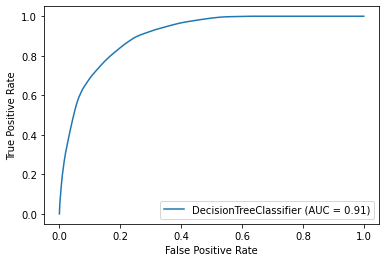

In [184]:
# plot roc curve

plot_roc_curve(dt_best, df_train_pca, y_train)
plt.show()

#### Observation

- AUC Score (0.91)

In [185]:
# finding y_train_pred and y_test_pred

y_train_pred_pca = dt_best.predict(df_train_pca)
y_test_pred_pca = dt_best.predict(df_test_pca)

In [186]:
print(classification_report(y_train, y_train_pred_pca))

              precision    recall  f1-score   support

           0       0.99      0.77      0.86     19211
           1       0.26      0.88      0.40      1774

    accuracy                           0.78     20985
   macro avg       0.62      0.82      0.63     20985
weighted avg       0.92      0.78      0.82     20985



#### Observation (Train Data)

- Accuracy (78%)
- Recall (0.88)

In [187]:
print(classification_report(y_test, y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.97      0.76      0.86      8179
           1       0.25      0.80      0.38       815

    accuracy                           0.77      8994
   macro avg       0.61      0.78      0.62      8994
weighted avg       0.91      0.77      0.81      8994



## Fifth Model - DecisionTreeClassifier Model with PCA Results (Test Data)

- Accuracy(77%)
- Recall (0.80)

# Conclusion

Comparing the various models:

#### 1st Model

- AUC : 0.95
- Accuracy : 0.90
- Recall : 0.77


#### 2nd Model 

- AUC : 0.90
- Accuracy : 0.83
- Recall : 0.82


#### 3rd Model

- AUC : 0.88
- Accuracy : 0.83
- Recall : 0.78


#### 4th Model

- AUC : 0.94
- Accuracy : 0.70
- Recall : 0.90


#### 5th Model

- AUC : 0.94
- Accuracy : 0.77
- Recall : 0.80


Since, Recall (Sensitivity) is the primary performance metric for this Problem Statement, we would use and deploy that particular model in production which has produced the best Recall metric amongst all the models.

#### Hence, the 4th Model built using the ensemble technique : XGBoostClassifier along with PCA, is the best performing model


###  Top 10 most important features on which the business could focus upon (identified using the First Model - Random Forest)

- total_rech_amt_8
- total_og_mou_8
- total_ic_mou_8
- arpu_diff
- loc_og_t2f_mou_8
- loc_og_t2m_mou_8
- loc_ic_t2f_mou_8
- loc_ic_t2m_mou_8
- roam_og_mou_8
- std_ic_t2m_mou_8


The above listed features are the most important features for the business (based on feature importances in descending order) to analyse and understand customer behaviour

### Summary table of Top 10 predictors along with their coefficient values (derived using the First Model - Random Forest without PCA)

In [188]:
importances = rf_best.feature_importances_
col_names =  X_train.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'Col Name','Value'})
RF_feature_importance.head(10)

Value          Col Name
0  0.132374  total_rech_amt_8
1  0.103130    total_og_mou_8
2  0.075882    total_ic_mou_8
3  0.072122         arpu_diff
4  0.065737  loc_og_t2f_mou_8
5  0.062325  loc_og_t2m_mou_8
6  0.043765  loc_ic_t2f_mou_8
7  0.043147  loc_ic_t2m_mou_8
8  0.040870     roam_og_mou_8
9  0.026369  std_ic_t2m_mou_8

### Recommendations to the Business

- From above, we can conclude that total recharge amount done by the cutomer is a key factor for identifying churn
- Especially if it shows a dip in the action phase, then it could be an indicator of churn
- The other key factors are total minutes of usage of incoming and outgoing calls, if any of these show reduction during the action phase as compared to the good phas, then it could be an indicator of churn
- Average revenue per user is also a key indicator for identifying customer behaviour, if the average revenue per user decreases during the action phase as compared to the good phase, then it could be an indicator of churn